### Objectives:
In this notebook, I will use data extracted from Twitter regarding the currency demonetization in India in 2016 to apply sentiment analysis. I will classify the tweets to positive, negative & neutral. It is kind of unsupervised learning since we do not have a target variable. Further, I will do data cleaning since the tweets are not clean and have a lot of noise. <br>

After creating a target variable by the sentiment analysis, I will tarin classfication model using the labeled data. <br>

Source: Kaggle


In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pylab as plt

In [2]:
data= pd.read_csv('tweetsassign.csv' ,encoding='ANSI')
df=data.copy()

In [3]:
df['text']

0        RT @rssurjewala: Critical question: Was PayTM ...
1        RT @Hemant_80: Did you vote on #Demonetization...
2        RT @roshankar: Former FinSec, RBI Dy Governor,...
3        RT @ANI_news: Gurugram (Haryana): Post office ...
4        RT @satishacharya: Reddy Wedding! @mail_today ...
                               ...                        
14935    RT @saxenavishakha: Ghost of demonetization re...
14936    N d modi fans-d true nationalists of the count...
14937    RT @bharat_builder: Lol. Demonetization has fi...
14938    RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...
14939    @Vidyut B team of BJP. CIA baby. CCTV, EVM but...
Name: text, Length: 14940, dtype: object

### Data Cleaning

In [4]:
import nltk
import string

from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

# remove punch
# remove stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df['text'][0]

"RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…"

In [6]:
df['text'][28]

'RT @kapil_kausik: #Doltiwal I mean #JaiChandKejriwal is "hurt" by #Demonetization as the same has rendered USELESS <ed><U+00A0><U+00BD><ed><U+00B1><U+0089> "acquired funds" No wo…'

In [7]:
df['text'][14938]

"RT @Stupidosaur: @Vidyut B team of BJP. CIA baby. CCTV, EVM but with VVPAT, support 'surgical strikes', JNU drama, timepass in demonetizati…"

In [8]:
df['text'][13219]

'RT @IncomeTaxIndia: The opportunities created by demonetization are being used by the ITD for widening and deepening of the tax base and cr…'

In [9]:
punch = set(string.punctuation)
print(punch)

{'.', '?', '/', '`', '\\', '@', '~', '^', '*', '"', '!', '+', '$', '#', ')', '|', ']', '%', '{', '=', '[', '<', "'", ':', '_', ',', ';', '-', '}', '&', '(', '>'}


In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
import re

In [13]:
def preprocess_txt(t):
    ## This will remove the username , mentions & hashtags from the code
    txt=' '.join(re.sub(" (<.*>)|(<ed><u+00a0><u+00bd><ed><u+00b1><u+0089>)|(@[A-Za-z0-9]+)|(rt\s@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", t).split())
    print(txt)
    return txt

In [14]:
def remove_stopword(d):
    #print(sw_spacy)
    print(word_tokenize(d))
    words = [word.lower() for word in word_tokenize(d) if word.lower() not in stop_words and word.lower() not in punch ]
    print(words)
    text = " ".join(words)
    return text

    

In [15]:
df['text']=df['text'].str.lower().str.strip()
df['text']=df['text'].apply(preprocess_txt).apply(remove_stopword)



critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
80 did you vote on demonetization on modi survey app
former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization if not for aam aadmi listen to th
news gurugram haryana post office employees provide cash exchange to patients in hospitals demonetization
reddy wedding today cartoon demonetization reddywedding
india s demonetization blackmoney a symptom not the disease via
rs 40 lakh looted from a bank in kishtwar in j amp k third such incident since demonetization that s how terrorists have
911 calling all nationalists to join walk for corruptionfreeindia and spread the benefits of demonetization among the mas
many opposition leaders are with on the demonetization and respect their decision but support oppositio
national reform now destroyed even the essence of sagan such instances urge giving demonetization a second though
many opposition leade

huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
issey kehte hai jale pe namak chidakna busy thanking frm 3 days but not bothered
huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
bangalore s visits 23 atms to see if media is lying about the note ban demonetization
the most difficult condition to deal with is medical emergency with no cash card or insurance get
stopping supply of condoms will stop prostitution demonetization logic
well said ed u 00a0 u 00bd ed u 00b1 u 008f ed u 00a0 u 00bc ed u 00bf u 00bc ed u 00a0 u 00bd ed u 00b1 u 008f ed u 00a0 u 00bc ed u 00bf u 00bc ed u 00a0 u 00bd ed u 00b1 u 008f ed u 00a0 u 00bc ed u 00bf u 00bc at iec2016 on how wethepeople accepted demonetization peacefully did u watc
huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
cpiml the modi app on demonetization proves once again that th

etc indians can see through hypocrisy don t b blind in opposing you are embarrassing yourself demonetization
this isn t as awful as the demonetization woes i hear from field partners in villages but i see a pattern here 4 n
911 calling all nationalists to join walk for corruptionfreeindia and spread the benefits of demonetization among the mas
demonetization is certainly hurting lord behen bagwati and a lot
most funny amp ironic statement since the first day of demonetization
shiva sena and sad fall in line with the government on demonetization say we support the decision
very informative thread on demonetization must read
absolutely hilarious corrupt protesting in the name of poor against demonetization
huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
absolutely hilarious corrupt protesting in the name of poor against demonetization
823 people still scrounge the streets in search of money demonetization
huge support for pm s demon

huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
ioc giving cash through mini atms to people in hinterland indiakadil helping rural people in demonetization
huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
demonetization finally no country at such a large scale has gone ahead with such a move give it to all us citizens
even if you re 100 white money amp even if you re unaffected this demonetization move has given a lot of folks a reason to pa
huge support for pm s demonetization move across the nation 80 86 people back demonetization c voter su
demonetization situation much better over rs 6 lakh crore deposited government tells sc via
my dad is a chief mgr in a regional rur

putting nation over party politics nitishkumar supports pm on demonetization
can t say anything about productivity but creativity has increased after demonetization 2016
putting nation over party politics nitishkumar supports pm on demonetization
frankly i don t understand why doesn t address parlmnt on demonetization it s his duty amp wil
critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
and the oscar goes to mr u 092d u 093e u 0935 u 0941 u 0915 demonetization
putting nation over party politics nitishkumar supports pm on demonetization
sharma if rs 3 lakh cr expected from demonetization is a windfall what would we term rs 6 23 lk cr tax exemptions to india
putting nation over party politics nitishkumar supports pm on demonetization
rs 40 lakh looted from a bank in kishtwar in j amp k third such incident since demonetization that s how terrorists have
krishnan sanghi dms ban social media criticism of demonetizatio

india watch briefing on demonetization by dea secy this morning here
india watch briefing on demonetization by dea secy this morning here
india watch briefing on demonetization by dea secy this morning here
india watch briefing on demonetization by dea secy this morning here
india watch briefing on demonetization by dea secy this morning here
india watch briefing on demonetization by dea secy this morning here
arunjaitley says people are happy with demonetization rs 31 lakh scrapped notes seized from bjp leader s brother
yousuf police men beats industrialists ambani groups black money holders for standing in queue demonetization this cop des
critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
rs 40 lakh looted from a bank in kishtwar in j amp k third such incident since demonetization that s how terrorists have
rs 40 lakh looted from a bank in kishtwar in j amp k third such incident since demonetization that s how te

and the oscar goes to mr u 092d u 093e u 0935 u 0941 u 0915 demonetization
question in narendra modi app where pm is taking feedback if people support his demonetization strategy
man ends life over fund shortage ahead of daughter s wedding in gujarat demonetization
man ends life over fund shortage ahead of daughter s wedding in gujarat demonetization
can t say anything about productivity but creativity has increased after demonetization 2016
demonetization its implications mobile money penetration strong medicine black money in india
question in narendra modi app where pm is taking feedback if people support his demonetization strategy
and the oscar goes to mr u 092d u 093e u 0935 u 0941 u 0915 demonetization
and the oscar goes to mr u 092d u 093e u 0935 u 0941 u 0915 demonetization
1983 continue with your rants against demonetization people of bengal has answered you lol salaam
will apologize to the nation for spreading rumors about demonetization
khan now nation needs ur voice to sup

1 n one can have a cynical view on demonetization but one should not loose the faith in the adaptability of fellow indi
everyone seems to hate the rich even the rich hates richer and the richer hates the richest demonetization
byelection was on 15 seats bjp won only 5 seats and 9 by opposition demonetization effects as modiji explained
can t say anything about productivity but creativity has increased after demonetization 2016
mp today again demonetization debate in parlmnt stalled due to disruption i dont undrstnd why oppstn wants to stall its ow
delhiites least affected by demonetization amp long queues at atms they are doing online transactions with free wi fi
i just can t figure out what does he actually want kejriwal demonetization aaptards kaala pani was meant f
1983 continue with your rants against demonetization people of bengal has answered you lol salaam
rt miteshpatel you re forgetting the motive demonetization drama is just a pr exercise just a means through which pro feku 

since demonetization was announced i have been living like i used to when i was doing engineering haven t taken any not
these kerala women are least bothered about demonetization because they hardly ever see 500 and 1000 notes 1 12
man ends life over fund shortage ahead of daughter s wedding in gujarat demonetization
policy basically market needed rs 100 notes printing of rs 100 notes could have been done before demonetization no babu anticipated
even if you re 100 white money amp even if you re unaffected this demonetization move has given a lot of folks a reason to pause amp think lt
thore indiafightscorruption the honest feel vindicated by the historic move on demonetization ji bjp parliamenta
man ends life over fund shortage ahead of daughter s wedding in gujarat demonetization
retaining all seats of ls and state in byelection by bjp has proved the people s support on demonetization it should be abov
indore s collector would like you to shut up about demonetization at we think that

thore indiafightscorruption the honest feel vindicated by the historic move on demonetization ji bjp parliamenta
critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
and the oscar goes to mr u 092d u 093e u 0935 u 0941 u 0915 demonetization
jaitley declared rs72l cash in hand this year then why hound ordinary ppl who deposits rs2l in2a c demonetization http
take the demonetization survey and pls put an honest reply to question number 9 kejrikajuth
these kerala women are least bothered about demonetization because they hardly ever see 500 and 1000 notes 1 12
critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
dy cm detaiend at parliament street police station as they march to parliament against demonetization not
rt rssurjewala critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
ja

must watch delhities standing in long bank que s praising pm modi s demonetization amp cursing thug htt
thore indiafightscorruption the honest feel vindicated by the historic move on demonetization ji bjp parliamenta
retweeted ankit lal full video of s interaction with people on demonetization
full video of s interaction with people on demonetization being a scam of 8 lakh crore rupees
critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
demonetization 82 500 atms re calibrated to dispense new notes
dy cm detaiend at parliament street police station as they march to parliament against demonetization not
demonetization 82 500 atms re calibrated to dispense new notes
but modi amp chamchas told terrorism wiped off after demonetization
demonetization hpnes ladies at mmbi extend help 4 fillingforms water at sbi mahul rd brnch bringingsmilles
but modi amp chamchas told terrorism wiped off after demonetization
demonetization

congress is not even getting seats equal to regional parties this shows people has accepted the demonetization bypolls
critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
go cashless pay through payzapp at our outlet hdfcbank payzapp cashless demonetization
yes we support our pm namo decision demonetization
and the oscar goes to mr u 092d u 093e u 0935 u 0941 u 0915 demonetization
india will get windfall profit of whooping 4 lakh crores in 30 days due to demonetization why people like ak pappu amp mamata
and the oscar goes to mr u 092d u 093e u 0935 u 0941 u 0915 demonetization
a great compilation of every indian currency note ever printed india currency history money demonetization
critical question was paytm informed about demonetization edict by pm it s clearly fishy and requires full disclosure amp
indore s collector would like you to shut up about demonetization at we think that is a problem https
1980s narendra

so they pick pocketing us in the guise of demonetization and service charges
many thanks conversation was on ubi universal basic income link here
23 folds increase in digital transaction after demonetization via news
23 folds increase in digital transaction after demonetization via news
post demonetization economy to grow at 7 4 acc to asian development bank world bank says note ban will have positiv
so they pick pocketing us in the guise of demonetization and service charges
against the general perception realestate prices actually increased across the country during the
pepsi ad commercial with kendall jenner exposed real reason of youtube demonetization
the latest the demonetization daily technology
3 if that had happened it would have been a windfall alas it never happened demonetization had 2 be consigned 2 history as a disaster
23 folds increase in digital transaction after demonetization via news
23 folds increase in digital transaction after demonetization via news
builder if t

gadkari first demonetization now red beacons nam k neta l
plz confirm how many times u have stand in a queue during demonetization
imf india growth forecast for fy18 at 7 2 and fy19 at 7 7 well ahead of its forecast for china where is demonetization effect
take on hurdles of online jewelry trading demonetization and more via
wolf some people try to make money with a commentary or journalism channel demonet
this is what happens after demonetization new ways to make the lost money ehh
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
voted 3 years ago in loksabha elections nothing gained personally pains of demonetization standing searching for cash in atm queues now
all those who say demonetization was not a good move just look at proactive ed n income tax raids right now major crackdown on black money
how india became bill gates guinea pig a conspiracy as recounted by the main actors
many thanks conversation was on ubi universal bas

the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article from motilal oswal services https
the overall impact of demonetization on the education system in india an article

actually modi earned popularity all over the world before demonetization bjp rbi amp banks worked
india s attempt to go cashless is turning food demonetization india corporatebusiness add
india s attempt to go cashless is turning food vouchers digital demonetization
demonetization out of cash more than 90 of india atms run dry
still bickering on demonetization really amazing every so often an expiry dated award wa
india s attempt to go cashless is turning food vouchers digital demonetization
hanke atms across india running out of cash once again after withdrawal restrictions were loosened and modi still claims demo
india s attempt to go cashless is turning food vouchers digital demonetization corporatebusiness
demonetization out of cash more than 90 of india atms run dry
it s an opportune time for indian vcs says via
hanke atms across india running out of cash once again after withdrawal restrictions were loosened and modi still claims demo
india s attempt to go cashless is turning foo

jp morgan notes that economic data has begun to revert to mean post demonetization
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
hanke atms across india running out of cash once again after withdrawal restrictions were loosened and modi still claims demo
seeing munaf patel back after ages thought we lost him in demonetization glvmi
hanke atms across india running out of cash once again after withdrawal restrictions were loosened and modi still claims demo
with rbi not cutting rates what was the gain of demonetization sir please answer correctly don t be a modi s pappu
hanke atms across india running out of cash once again after withdrawal restrictions were loosened and modi still claims demo
dear indiaa is so rich that pm narendra modi had to implement demonetization to find out who is actually poor snapchat ed u 00a0 u 00bd e

dear snapchat india is so rich that our pmmodi applied demonetization to find out who is actually poor boycottsnapchat snapchatceo
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
boycottsnapchat the country where people drained more money during demonetization than total worth of the company
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that 

dear evanspiegel india is so rich that pm narendra modi had to implement demonetization to find
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear evanspiegel india is so rich that pm narendra modi had to implement demonetization to find
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear india is so rich that pm narendra modi had to implement demonetization to find out who is actually
dear evanspiegel india is so rich that pm narendra modi had to implement demonetization to find
dear evanspiegel india is so rich that pm narendra modi had to implement demonetization to find
dear india is so rich that pm narendra modi had to implement demonetization to find out who is a

youtube demonetization young turks maintains silence and more people ar via
isn t it time for the demonetization of spirituality and the renaissance of lovingly and freely sharing
people have got stunts like swachata diwas yoga day demonetization anti romeo drives gau rakshaks etc yet de have voted for
youtube flags my videos for demonetization then after most people have already watched them they will reinstate ads thus i ge
youtube flags my videos for demonetization then after most people have already watched them they will reinstate ads thus i ge
so does this wrestling demonetization thing on youtube include wrestling video games
youtube flags my videos for demonetization then after most people have already watched them they will reinstate ads thus i ge
youtube flags my videos for demonetization then after most people have already watched them they will reinstate ads thus i ge
youtube flags my videos for demonetization then after most people have already watched them they will reins

no evidence that demonetization was the disaster that all of us predicted says acjlive
debate on demonetization was it the right way to make india go cashless at
debate on demonetization was it the right way to make india go cashless at
it s looking like this demonetization crisis might be coming to an end fingers crossed
mahajan navroop burton exclusive research on the global waroncash target india
it s looking like this demonetization crisis might be coming to an end fingers crossed
mahajan navroop burton exclusive research on the global waroncash target india
demonetization made little impact with money being flung around for votes in the recently concluded assembly polls
i liked a video let s talk about syria and youtube demonetization
rana but modi govt told us that demonetization has finished corruption in india weird another round of demon
it is interesting that there were no public protests or political rallies during demonetisation demonetization thehinducentre
built street cr

headline blames demonetization report says lack of supply due to staff shortage and year end closing
awaaz awaaz ghai
prohibition is demonetization 2 0 you kept quiet when poor men s tobacco gutkha was banned now they ll love your englis
koning during wwii hawaiian banknotes were printed if japan invaded hawaii a quick demonetization would render them unusable by o
the demonetization conflict between ideas vs ideologies via yadav
prohibition is demonetization 2 0 you kept quiet when poor men s tobacco gutkha was banned now they ll love your englis
prohibition is demonetization 2 0 you kept quiet when poor men s tobacco gutkha was banned now they ll love your englis
headline blames demonetization report says lack of supply due to staff shortage and year end closing
headline blames demonetization report says lack of supply due to staff shortage and year end closing
demonetization has made home buying more affordable and accessible for a common man read to know more
my question in parliam

['demonetization', 'searches', 'narendramodi', 'app', 'trending', 'app', 'stores']
['rt', 'avenu', 'teacher', 'is', 'there', 'anybody', 'who', 'is', 'absent', 'today', 'no', 'response', 'teacher', 'says', '100', 'attendance', 'demonetization', 'app', 'survey']
['rt', 'avenu', 'teacher', 'anybody', 'absent', 'today', 'response', 'teacher', 'says', '100', 'attendance', 'demonetization', 'app', 'survey']
['8', 'this', 'tweet', 'of', 'bibi', 'explains', 'why', 'she', 'is', 'having', 'a', 'prob', 'with', 'demonetization', 'in', 'first', 'part', 'she', 'says', 'she', 'can', 't']
['8', 'tweet', 'bibi', 'explains', 'prob', 'demonetization', 'first', 'part', 'says']
['demonetization', 'is', 'communal', 'and', 'black', 'money', 'is', 'secular']
['demonetization', 'communal', 'black', 'money', 'secular']
['lol', 'demonetization', 'effect']
['lol', 'demonetization', 'effect']
['kausik', 'doltiwal', 'i', 'mean', 'jaichandkejriwal', 'is', 'hurt', 'by', 'demonetization', 'as', 'the', 'same', 'has', '

['issues', 'demonetization', 'maid', 'son', 'exchanged', 'money', '15', 'mins', 'son']
['demonetization', 'is', 'disaster', 'pk']
['demonetization', 'disaster', 'pk']
['krishna', 'before', 'and', 'after', 'gandhi', 'ji', 'heard', 'they', 'are', 'standing', 'there', 'against', 'demonetization']
['krishna', 'gandhi', 'ji', 'heard', 'standing', 'demonetization']
['would', 'be', 'interesting', 'to', 'look', 'at', 'this', 'research', 'again', 'in', 'light', 'of', 'demonetization', 'a', 'real', 'blackswan']
['would', 'interesting', 'look', 'research', 'light', 'demonetization', 'real', 'blackswan']
['demonetization', 'is', 'disaster', 'pk']
['demonetization', 'disaster', 'pk']
['911', 'calling', 'all', 'nationalists', 'to', 'join', 'walk', 'for', 'corruptionfreeindia', 'and', 'spread', 'the', 'benefits', 'of', 'demonetization', 'among', 'the', 'mas']
['911', 'calling', 'nationalists', 'join', 'walk', 'corruptionfreeindia', 'spread', 'benefits', 'demonetization', 'among', 'mas']
['krishna', '

['gadgets360', 'after', 'the', 'demonetization', 'searches', 'about', 'narendramodi', 's', 'app', 'are', 'trending', 'on', 'app', 'stores']
['gadgets360', 'demonetization', 'searches', 'narendramodi', 'app', 'trending', 'app', 'stores']
['demonetization', 'move', 'of', 'modi', 'who', 'is', 'supporting', 'it', 'who', 'is', 'opposing', 'it', 'and', 'why', 'a', 'complete', 'coverage', 'of', 'all', 'parties']
['demonetization', 'move', 'modi', 'supporting', 'opposing', 'complete', 'coverage', 'parties']
['80', 'did', 'you', 'vote', 'on', 'demonetization', 'on', 'modi', 'survey', 'app']
['80', 'vote', 'demonetization', 'modi', 'survey', 'app']
['80', 'did', 'you', 'vote', 'on', 'demonetization', 'on', 'modi', 'survey', 'app']
['80', 'vote', 'demonetization', 'modi', 'survey', 'app']
['survey', 'result', 'so', 'far', 'by', 'on', 'demonetization', '5', 'lakh', 'response', 'in', '24', 'hrs', '90', 'supports', 'note', 'ban', 'meradeshbadalraha']
['survey', 'result', 'far', 'demonetization', '5'

['hitler', 'finds', 'out', 'about', 'demonetization', 'read', 'the', 'subtitles']
['hitler', 'finds', 'demonetization', 'read', 'subtitles']
['on', 'at', '9pm', 'demonetization']
['9pm', 'demonetization']
['krishna', 'the', 'effect', 'of', 'demonetization']
['krishna', 'effect', 'demonetization']
['80', 'did', 'you', 'vote', 'on', 'demonetization', 'on', 'modi', 'survey', 'app']
['80', 'vote', 'demonetization', 'modi', 'survey', 'app']
['hpcl', 'gmo', 'sz', 'team', 'assisting', 'people', 'at', 'chennai', 'during', 'demonetization', '1', '2']
['hpcl', 'gmo', 'sz', 'team', 'assisting', 'people', 'chennai', 'demonetization', '1', '2']
['demonetization', 'fallout', 'future', 'cars', 'will', 'be', 'fitted', 'with', 'digital', 'identity', 'tags', 'autonews']
['demonetization', 'fallout', 'future', 'cars', 'fitted', 'digital', 'identity', 'tags', 'autonews']
['demonetization', 'survey', 'results', 'after', '24', 'hours', '5lacs', 'opinions', 'amazing', 'response', 'amp', 'commitment', 'in', '

['question', 'narendra', 'modi', 'app', 'pm', 'taking', 'feedback', 'people', 'support', 'demonetization', 'strategy']
['demonetization', 'the', 'time', 'has', 'come', 'to', 'put', 'mudra', 'into', 'action', 'writes', 'prof', 'r', 'vaidyanathan']
['demonetization', 'time', 'come', 'put', 'mudra', 'action', 'writes', 'prof', 'r', 'vaidyanathan']
['it', 's', 'karma', 'blackmoney', 'demonetization', 'eksacchakadam', 'norollbackofdemonetization']
['karma', 'blackmoney', 'demonetization', 'eksacchakadam', 'norollbackofdemonetization']
['left', 'is', 'going', 'to', 'file', 'a', 'petition', 'in', 'sc', 'against', 'govts', 'decision', 'on', 'demonetization', 'my', 'que', 'is', 'why', 'the', 'hell', 'don', 't', 'you', 'debate', 'i']
['left', 'going', 'file', 'petition', 'sc', 'govts', 'decision', 'demonetization', 'que', 'hell', 'debate']
['when', 'life', 'gives', '500', 'or', '1000', 'reasons', 'to', 'struggle', 'show', 'the', 'world', 'that', 'you', 'have', '2000', 'reasons', 'to', 'smile', '

['911', 'calling', 'nationalists', 'join', 'walk', 'corruptionfreeindia', 'spread', 'benefits', 'demonetization', 'among', 'mas']
['92', 'people', 'suppo', 's', 'demonetization', 'on', 'modi', 'app', 'amp', 'insist', 'decision', 'should', 'not', 'be', 'back']
['92', 'people', 'suppo', 'demonetization', 'modi', 'app', 'amp', 'insist', 'decision', 'back']
['putting', 'nation', 'over', 'party', 'politics', 'nitishkumar', 'supports', 'pm', 'on', 'demonetization']
['putting', 'nation', 'party', 'politics', 'nitishkumar', 'supports', 'pm', 'demonetization']
['demonetization', 'the', 'time', 'has', 'come', 'to', 'put', 'mudra', 'into', 'action', 'writes', 'prof', 'r', 'vaidyanathan']
['demonetization', 'time', 'come', 'put', 'mudra', 'action', 'writes', 'prof', 'r', 'vaidyanathan']
['putting', 'nation', 'over', 'party', 'politics', 'nitishkumar', 'supports', 'pm', 'on', 'demonetization']
['putting', 'nation', 'party', 'politics', 'nitishkumar', 'supports', 'pm', 'demonetization']
['92', 'peop

['pm', 'is', 'in', 'dream', 'land', 'of', 'cashless', 'economy', 'atms', 'in', 'big', 'it', 'companies', 'are', 'also', 'not', 'spared', 'from', 'long', 'serpentine', 'queues', 'for', 'cash', 'demonetization']
['pm', 'dream', 'land', 'cashless', 'economy', 'atms', 'big', 'companies', 'also', 'spared', 'long', 'serpentine', 'queues', 'cash', 'demonetization']
['all', 'the', 'opposition', 'which', 'is', 'protesting', 'against', 'demonetization', 'should', 'be', 'asked', 'to', 'protest', 'at', 'loc', 'let', 's', 'see', 'how', 'many', 'ga']
['opposition', 'protesting', 'demonetization', 'asked', 'protest', 'loc', 'let', 'see', 'many', 'ga']
['700', 'crores', 'rupees', 'of', 'cash', 'found', 'in', '3', 'medical', 'colleges', 'clearing', 'the', 'massive', 'rot', 'in', 'medical', 'admissions', 'demonetization']
['700', 'crores', 'rupees', 'cash', 'found', '3', 'medical', 'colleges', 'clearing', 'massive', 'rot', 'medical', 'admissions', 'demonetization']
['putting', 'nation', 'over', 'party',

['demonetization', 'certainly', 'hurting', 'lord', 'behen', 'bagwati', 'lot']
['huge', 'support', 'for', 'pm', 's', 'demonetization', 'move', 'across', 'the', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['huge', 'support', 'pm', 'demonetization', 'move', 'across', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['it', 's', 'game', 'set', 'amp', 'match', 'to', 'pm', 'modi', 'demonetization']
['game', 'set', 'amp', 'match', 'pm', 'modi', 'demonetization']
['this', 'cuts', 'through', 'the', 'bullshit', 'into', 'critical', 'legal', 'issues', 'regarding', 'demonetization', 'mustread', 'via']
['cuts', 'bullshit', 'critical', 'legal', 'issues', 'regarding', 'demonetization', 'mustread', 'via']
['days', 'before', 'demonetization', 'announcement', 'sold', 'his', 'heritage', 'shares', 'clearly', 'evident', 'that', 'he', 'had', 'prior', 'knowledge', 'of', 'the']
['days', 'demonetization', 'announcement', 'sold', 'heritage', 'shares',

['huge', 'support', 'pm', 'demonetization', 'move', 'across', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['in', 'which', 'calvin', 'amp', 'hobbes', 'plan', 'demonetization']
['calvin', 'amp', 'hobbes', 'plan', 'demonetization']
['anti', 'corruption', 'crusader', 'clear', 'on', 'demonetization', 'being', 'true', 'step', 'towards', 'corruption', 'free', 'india', 'notwithstanding']
['anti', 'corruption', 'crusader', 'clear', 'demonetization', 'true', 'step', 'towards', 'corruption', 'free', 'india', 'notwithstanding']
['demonetization', 'other', 'than', 'the', 'usual', 'suspects', 'making', 'usual', 'noises', 'majority', 'of', 'indians', 'still', 'trust', 'on', 'a']
['demonetization', 'usual', 'suspects', 'making', 'usual', 'noises', 'majority', 'indians', 'still', 'trust']
['righttimetoinvest', 'while', 'the', 'entire', 'nation', 'is', 'debating', 'about', 'the', 'after', 'effects', 'of', 'demonetization', 'our', 'founder']
['righttimetoinvest', 'entire

['6', 'lakh', 'crore', 'rupees', 'blackmoney', 'collected', 'far', 'demonetization', 'amp', 'congress', 'protesting', 'gandhi', 'statue', 'shaming', 'mahatma']
['i', 'personally', 'think', 'that', 'india', 's', 'decision', 'for', 'demonetization', 'is', 'a', 'great', 'decision', 'so', 'why', 'these', 'opposition', 'parties', 'are', 'protesting']
['personally', 'think', 'india', 'decision', 'demonetization', 'great', 'decision', 'opposition', 'parties', 'protesting']
['huge', 'support', 'for', 'pm', 's', 'demonetization', 'move', 'across', 'the', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['huge', 'support', 'pm', 'demonetization', 'move', 'across', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['911', 'calling', 'all', 'nationalists', 'to', 'join', 'walk', 'for', 'corruptionfreeindia', 'and', 'spread', 'the', 'benefits', 'of', 'demonetization', 'among', 'the', 'mas']
['911', 'calling', 'nationalists', 'join', 'walk', 'c

['the', 'mic', 'of', 'a', 'bsp', 'leader', 'was', 'snatched', 'away', 'from', 'him', 'as', 'he', 'started', 'praising', 'modiji', 'for', 'his', 'demonetization', 'move', 'during', 'mayawati']
['mic', 'bsp', 'leader', 'snatched', 'away', 'started', 'praising', 'modiji', 'demonetization', 'move', 'mayawati']
['retaining', 'all', 'seats', 'of', 'ls', 'and', 'state', 'in', 'byelection', 'by', 'bjp', 'has', 'proved', 'the', 'people', 's', 'support', 'on', 'demonetization', 'it', 'should', 'be', 'abov']
['retaining', 'seats', 'ls', 'state', 'byelection', 'bjp', 'proved', 'people', 'support', 'demonetization', 'abov']
['government', 'demonetization', 'process']
['government', 'demonetization', 'process']
['hanke', 'demonetization', 'should', 'only', 'be', 'implemented', 'in', 'times', 'of', 'crisis', 'india', 'has', 'implemented', 'in', 'a', 'time', 'otherwise', 'and', 'chaos', 'will', 'e']
['hanke', 'demonetization', 'implemented', 'times', 'crisis', 'india', 'implemented', 'time', 'otherwis

['huge', 'support', 'pm', 'demonetization', 'move', 'across', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['tinku14', 'they', 're', 'under', 'the', 'wrong', 'impression', 'that', 'govt', 'will', 'roll', 'back', 'demonetization', 'by', 'doing', 'all', 'these', 'dramas']
['tinku14', 'wrong', 'impression', 'govt', 'roll', 'back', 'demonetization', 'dramas']
['huge', 'support', 'for', 'pm', 's', 'demonetization', 'move', 'across', 'the', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['huge', 'support', 'pm', 'demonetization', 'move', 'across', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['huge', 'support', 'for', 'pm', 's', 'demonetization', 'move', 'across', 'the', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['huge', 'support', 'pm', 'demonetization', 'move', 'across', 'nation', '80', '86', 'people', 'back', 'demonetization', 'c', 'voter', 'su']
['huge', 's

['demonetization', 'many', 'families', 'realised', 'that', 'they', 'can', 'live', 'with', 'less', 'cash', 'in', 'hand', 'by', 'moving', 'to', 'plastic', 'and', 'online', 'trxns']
['demonetization', 'many', 'families', 'realised', 'live', 'less', 'cash', 'hand', 'moving', 'plastic', 'online', 'trxns']
['demonetization', '1946', 'sardarpatel', '1978', 'morarjidesai', '2016', 'narendramodi', 'common', 'factor', 'congress', 'not', 'in', 'power', 'all', '3', 'gujjus', 'think']
['demonetization', '1946', 'sardarpatel', '1978', 'morarjidesai', '2016', 'narendramodi', 'common', 'factor', 'congress', 'power', '3', 'gujjus', 'think']
['ratantata', 'supports', 'pm', 'narendra', 'modi', 'for', 'demonetization']
['ratantata', 'supports', 'pm', 'narendra', 'modi', 'demonetization']
['86', 'of', 'indians', 'from', 'both', 'rural', 'amp', 'urban', 'areas', 'support', 'demonetization', 'feel', 'it', 'was', 'worth', 'the', 'inconvenience']
['86', 'indians', 'rural', 'amp', 'urban', 'areas', 'support', '

['demonetization', 'finally', 'no', 'country', 'at', 'such', 'a', 'large', 'scale', 'has', 'gone', 'ahead', 'with', 'such', 'a', 'move', 'give', 'it', 'to', 'all', 'us', 'citizens']
['demonetization', 'finally', 'country', 'large', 'scale', 'gone', 'ahead', 'move', 'give', 'us', 'citizens']
['joined', 'the', 'line', 'of', 'opposition', 'mps', 'demonstrating', 'solidarity', 'on', 'demonetization', 'amp', 'demanding', 'that', 'address', 'parliame']
['joined', 'line', 'opposition', 'mps', 'demonstrating', 'solidarity', 'demonetization', 'amp', 'demanding', 'address', 'parliame']
['demonetization', 'other', 'than', 'the', 'usual', 'suspects', 'making', 'usual', 'noises', 'majority', 'of', 'indians', 'still', 'trust', 'on', 'a']
['demonetization', 'usual', 'suspects', 'making', 'usual', 'noises', 'majority', 'indians', 'still', 'trust']
['demonetization', 'it', 'will', 'always', 'be', 'vision', '2020', 'in', 'hindsight', 'many', 'things', 'could', 'hv', 'been', 'done', 'better', 'it', 'was'

['demonetization', 'some', 'thoughts', '2', 'weeks', 'over', 'after', 'that', '8', '00', 'pm', 'speech', 'lines', 'hv', 'reduced', 'at', 'banks', 'for', 'exchange', 'atms', 'h']
['demonetization', 'thoughts', '2', 'weeks', '8', '00', 'pm', 'speech', 'lines', 'hv', 'reduced', 'banks', 'exchange', 'atms', 'h']
['joined', 'the', 'line', 'of', 'opposition', 'mps', 'demonstrating', 'solidarity', 'on', 'demonetization', 'amp', 'demanding', 'that', 'address', 'parliame']
['joined', 'line', 'opposition', 'mps', 'demonstrating', 'solidarity', 'demonetization', 'amp', 'demanding', 'address', 'parliame']
['vas', 'per', 'c', 'voter', 'on', 'demonetization', 'approximately', '80', 'not', 'inconvenienced', '25', 'good', 'idea', 'poor', 'implementation', '5', 'bad', 'idea', 'poor']
['vas', 'per', 'c', 'voter', 'demonetization', 'approximately', '80', 'inconvenienced', '25', 'good', 'idea', 'poor', 'implementation', '5', 'bad', 'idea', 'poor']
['putting', 'nation', 'over', 'party', 'politics', 'nitish

['corrupt', 'cowards', 'ran', 'away', 'from', 'parliament', 'they', 'will', 'not', 'debate', 'demonetization', 'they', 'have', 'nothing', 'to', 'say', 'other', 'than', 'person']
['corrupt', 'cowards', 'ran', 'away', 'parliament', 'debate', 'demonetization', 'nothing', 'say', 'person']
['man', 'ends', 'life', 'over', 'fund', 'shortage', 'ahead', 'of', 'daughter', 's', 'wedding', 'in', 'gujarat', 'demonetization', 'https']
['man', 'ends', 'life', 'fund', 'shortage', 'ahead', 'daughter', 'wedding', 'gujarat', 'demonetization', 'https']
['blames', 'opposition', 'for', 'not', 'allowing', 'parliament', 'to', 'function', 'by', 'creating', 'uproar', 'over', 'demonetization', 'iss']
['blames', 'opposition', 'allowing', 'parliament', 'function', 'creating', 'uproar', 'demonetization', 'iss']
['cooperative', 'banks', 'shut', 'down', 'sowing', 'season', 'completely', 'disrupted', 'agri', 'markets', 'amp', 'farmers', 'badly', 'affected', 'demonetization']
['cooperative', 'banks', 'shut', 'sowing', 

['sc', 'despite', 'ruling', 'out', 'staying', 'proceedings', 'in', 'all', 'pils', '15', 'so', 'far', 'on', 'demonetization', 'has', 'however', 'asked', 'the', 'ag', 'to', 'file', 'a']
['sc', 'despite', 'ruling', 'staying', 'proceedings', 'pils', '15', 'far', 'demonetization', 'however', 'asked', 'ag', 'file']
['demonetization', 'what', 'if', 'overall', 'deposited', 'demonetized', 'currency', 'amount', 'goes', 'beyond', 'actual', 'currency', 'released', 'by', 'rbi']
['demonetization', 'overall', 'deposited', 'demonetized', 'currency', 'amount', 'goes', 'beyond', 'actual', 'currency', 'released', 'rbi']
['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists']
['demonetization', 'effect', '21', 'lakh', 'tea', 'jute', 'workers', '

['getting', 'instant', 'money', 'can', 'be', 'a', 'hassle', 'but', 'getting', 'insta', 'relief', 'from', 'nasal', 'allergy', 'will', 'never', 'be', 'an', 'issue', 'with', 'stop']
['getting', 'instant', 'money', 'hassle', 'getting', 'insta', 'relief', 'nasal', 'allergy', 'never', 'issue', 'stop']
['putting', 'nation', 'over', 'party', 'politics', 'nitishkumar', 'supports', 'pm', 'on', 'demonetization']
['putting', 'nation', 'party', 'politics', 'nitishkumar', 'supports', 'pm', 'demonetization']
['impact', 'of', 'demonetization', 'on', 'residential', 'real', 'estate', 'by', 'ashwinderraj', 'demonetization', 'jllindia']
['impact', 'demonetization', 'residential', 'real', 'estate', 'ashwinderraj', 'demonetization', 'jllindia']
['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third',

['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists']
['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists']
['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists']
['rs', '40', 'lakh', 'looted', 'from'

['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists']
['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists']
['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists']
['rs', '40', 'lakh', 'looted', 'from', 'a', 'bank', 'in', 'kishtwar', 'in', 'j', 'amp', 'k', 'third', 'such', 'incident', 'since', 'demonetization', 'that', 's', 'how', 'terrorists', 'have']
['rs', '40', 'lakh', 'looted', 'bank'

['despite', 'demonetization', 'india', 'godrej', 'expect', 'good', 'growth', 'next', 'year', 'says', 'group', 'chairman', 'mr', 'adi', 'godrej', 'https']
['before', 'the', 'bypolls', 'this', 'will', 'decide', 'demonetization', 'of', 'modi', 'after', 'the', 'results', 'bypolls', 'has', 'nothing', 'to', 'do', 'with', 'demonetizat']
['bypolls', 'decide', 'demonetization', 'modi', 'results', 'bypolls', 'nothing', 'demonetizat']
['sc', 'issued', 'notice', 'on', 'transfer', 'and', 'stay', 'petitions', 'filed', 'by', 'centre', 'to', 'transfer', 'all', 'matters', 'relating', 'to', 'demonetization', 'to', 'one', 'court', 'no', 'stay']
['sc', 'issued', 'notice', 'transfer', 'stay', 'petitions', 'filed', 'centre', 'transfer', 'matters', 'relating', 'demonetization', 'one', 'court', 'stay']
['stopping', 'supply', 'of', 'condoms', 'will', 'stop', 'prostitution', 'demonetization', 'logic']
['stopping', 'supply', 'condoms', 'stop', 'prostitution', 'demonetization', 'logic']
['demonetization', 'effect

['telangana', 'telangana', 'govt', 's', 'innovative', 'solution', 'to', 'help', 'farmers', 'affected', 'due', 'to', 'demonetization']
['telangana', 'telangana', 'govt', 'innovative', 'solution', 'help', 'farmers', 'affected', 'due', 'demonetization']
['following', 'demonetization', 'of', 'rs500', '1k', 'notes', 'and', 'launch', 'of', 'rs2k', 'notes']
['following', 'demonetization', 'rs500', '1k', 'notes', 'launch', 'rs2k', 'notes']
['question', 'in', 'narendra', 'modi', 'app', 'where', 'pm', 'is', 'taking', 'feedback', 'if', 'people', 'support', 'his', 'demonetization', 'strategy']
['question', 'narendra', 'modi', 'app', 'pm', 'taking', 'feedback', 'people', 'support', 'demonetization', 'strategy']
['there', 'is', 'always', 'first', 'time', 'for', 'everything', 'this', 'time', 'it', 's', 'politicians', 'coming', 'out', 'on', 'road', 'for', 'rally', 'and', 'no', 'common', 'men', 'demonetization']
['always', 'first', 'time', 'everything', 'time', 'politicians', 'coming', 'road', 'rally',

['demonetization', '5', 'effects', 'note', 'ban', 'common', 'man']
['and', 'the', 'oscar', 'goes', 'to', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['oscar', 'goes', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['gaganagrawal', 'thats', 'a', 'new', 'gem', 'demonetization', 'license', 'raj', 'kejriwal', 'amp', 'manta', 'must', 'be', 'wondering', 'how', 'they', 'missed', 'this', 'one', 'rachitsharma0', 'yo']
['gaganagrawal', 'thats', 'new', 'gem', 'demonetization', 'license', 'raj', 'kejriwal', 'amp', 'manta', 'must', 'wondering', 'missed', 'one', 'rachitsharma0', 'yo']
['and', 'the', 'oscar', 'goes', 'to', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['oscar', 'goes', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['man', 'ends', 'life', 'over', 'fund', 'shortage', 'ahead', 'of', 'daughter', 's', 'wedding', 'in', 

['indore', 's', 'collector', 'would', 'like', 'you', 'to', 'shut', 'up', 'about', 'demonetization', 'at', 'we', 'think', 'that', 'is', 'a', 'problem', 'https']
['indore', 'collector', 'would', 'like', 'shut', 'demonetization', 'think', 'problem', 'https']
['demonetization', 'paan', 'shop', 'owner', 'gets', 'fake', 'rs', '2', '000', 'note', 'in', 'ahmedabad']
['demonetization', 'paan', 'shop', 'owner', 'gets', 'fake', 'rs', '2', '000', 'note', 'ahmedabad']
['indore', 's', 'collector', 'would', 'like', 'you', 'to', 'shut', 'up', 'about', 'demonetization', 'at', 'we', 'think', 'that', 'is', 'a', 'problem', 'https']
['indore', 'collector', 'would', 'like', 'shut', 'demonetization', 'think', 'problem', 'https']
['vas', 'demonetization', 'is', 'a', 'great', 'leveler', 'the', 'quota', 'that', 'mushroomed', 'for', 'wealthy', 'in', 'the', 'light', 'of', 'the', 'caste', 'quota', 'that', 'took', 'away', 'ha']
['vas', 'demonetization', 'great', 'leveler', 'quota', 'mushroomed', 'wealthy', 'light',

['cpi', 'opposes', 'co', 'op', 'banks', 'west', 'bengal', 'supports', 'kerala', 'pawar', 'u', 'turned', 'demonetization']
['must', 'see', 'the', 'inside', 'details', 'of', 'the', 'biggest', 'scam', 'in', 'the', 'history', 'of', 'independent', 'india', 'demonetization']
['must', 'see', 'inside', 'details', 'biggest', 'scam', 'history', 'independent', 'india', 'demonetization']
['stopping', 'supply', 'of', 'condoms', 'will', 'stop', 'prostitution', 'demonetization', 'logic']
['stopping', 'supply', 'condoms', 'stop', 'prostitution', 'demonetization', 'logic']
['everyone', 'seems', 'to', 'hate', 'the', 'rich', 'even', 'the', 'rich', 'hates', 'richer', 'and', 'the', 'richer', 'hates', 'the', 'richest', 'demonetization']
['everyone', 'seems', 'hate', 'rich', 'even', 'rich', 'hates', 'richer', 'richer', 'hates', 'richest', 'demonetization']
['demonetization', 'mayhem', 'suffering', 'terrifying', 'surat', 'textile', 'down', 'by', '80', 'chennai', 'koyambedu', 'perishable', 'mkt', 'down', 'by',

['surprise', 'despite', 'temporay', 'hurdles', 'most', 'in', 'rural', 'bengal', 'in', 'mamata', 's', 'stronghold', 'support', 'modi', 's', 'demonetization', 'move', 'what']
['surprise', 'despite', 'temporay', 'hurdles', 'rural', 'bengal', 'mamata', 'stronghold', 'support', 'modi', 'demonetization', 'move']
['and', 'the', 'oscar', 'goes', 'to', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['oscar', 'goes', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['if', 'this', 'is', 'true', 'then', 'it', 's', 'the', 'biggest', 'benefit', 'of', 'demonetization', 'other', 'trrsts', 'amp', 'political', 'ldrs', 'will', 'fall', 'in', 'the', 'line', 'ht']
['true', 'biggest', 'benefit', 'demonetization', 'trrsts', 'amp', 'political', 'ldrs', 'fall', 'line', 'ht']
['everyone', 'seems', 'to', 'hate', 'the', 'rich', 'even', 'the', 'rich', 'hates', 'richer', 'and', 'the', 'richer', 'hates', 'the', 'richest', 'demonetizatio

['rt', 'miteshpatel', 'forgetting', 'motive', 'demonetization', 'drama', 'pr', 'exercise', 'means', 'pro', 'feku', 'media']
['rt', 'miteshpatel', 'do', 'we', 'have', 'any', 'reports', 'on', 'how', 'much', 'blackmoney', 'is', 'recovered', 'by', 'this', 'demonetization', 'or', 'is', 'it', 'just', 'pr', 'drama']
['rt', 'miteshpatel', 'reports', 'much', 'blackmoney', 'recovered', 'demonetization', 'pr', 'drama']
['rt', 'miteshpatel', 'demonetization', 'is', 'not', 'blunder', 'it', 's', 'deliberate', 'drama', 'being', 'done', 'for', 'pr', 'propaganda', 'don', 't', 'down', 'play', 'this']
['rt', 'miteshpatel', 'demonetization', 'blunder', 'deliberate', 'drama', 'done', 'pr', 'propaganda', 'play']
['rt', 'miteshpatel', 'demonetization', 'is', 'not', 'blunder', 'it', 's', 'deliberate', 'drama', 'being', 'done', 'for', 'pr', 'propaganda', 'don', 't', 'down', 'play', 'this']
['rt', 'miteshpatel', 'demonetization', 'blunder', 'deliberate', 'drama', 'done', 'pr', 'propaganda', 'play']
['rt', 'mite

['question', 'narendra', 'modi', 'app', 'pm', 'taking', 'feedback', 'people', 'support', 'demonetization', 'strategy']
['demonetization', 'bulletin', 'severe', 'liquidity', 'crisis', 'continues', 'dire', 'shortage', 'of', '500', 'reconfigured', 'atms', 'useless', 'bcoz', '2000']
['demonetization', 'bulletin', 'severe', 'liquidity', 'crisis', 'continues', 'dire', 'shortage', '500', 'reconfigured', 'atms', 'useless', 'bcoz', '2000']
['so', 'this', 'demonetization', 'has', 'been', 'so', 'tragic', 'in', 'implementation', 'that', 'modi', 'govt', 'is', 'flouting', 'rbi', 'rules', 'for', 'banking', 'license', 'and', 'oper']
['demonetization', 'tragic', 'implementation', 'modi', 'govt', 'flouting', 'rbi', 'rules', 'banking', 'license', 'oper']
['retaining', 'all', 'seats', 'of', 'ls', 'and', 'state', 'in', 'byelection', 'by', 'bjp', 'has', 'proved', 'the', 'people', 's', 'support', 'on', 'demonetization', 'it', 'should', 'be', 'abov']
['retaining', 'seats', 'ls', 'state', 'byelection', 'bjp', 

['question', 'narendra', 'modi', 'app', 'pm', 'taking', 'feedback', 'people', 'support', 'demonetization', 'strategy']
['demonetization', 'effect', 'here', 'comes', 'another', 'batch', 'of', 'maoists', 'keep', 'on', 'watching', 'more', 'to', 'come', 'nomoneyyaar']
['demonetization', 'effect', 'comes', 'another', 'batch', 'maoists', 'keep', 'watching', 'come', 'nomoneyyaar']
['question', 'in', 'narendra', 'modi', 'app', 'where', 'pm', 'is', 'taking', 'feedback', 'if', 'people', 'support', 'his', 'demonetization', 'strategy']
['question', 'narendra', 'modi', 'app', 'pm', 'taking', 'feedback', 'people', 'support', 'demonetization', 'strategy']
['cpiml', 'demonetization', 'is', 'a', 'big', 'time', 'gamble', 'which', 'may', 'result', 'in', 'a', 'major', 'economic', 'slowdown', 'apart', 'from', 'its', 'immediate', 'disruptive']
['cpiml', 'demonetization', 'big', 'time', 'gamble', 'may', 'result', 'major', 'economic', 'slowdown', 'apart', 'immediate', 'disruptive']
['demonetization', 'effect'

['indore', 's', 'collector', 'would', 'like', 'you', 'to', 'shut', 'up', 'about', 'demonetization', 'at', 'we', 'think', 'that', 'is', 'a', 'problem', 'https']
['indore', 'collector', 'would', 'like', 'shut', 'demonetization', 'think', 'problem', 'https']
['the', 'biggest', 'question', 'on', 'fb', 'after', 'demonetization', 'is', 'where', 'did', 'we', 'first', 'meet', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082']
['biggest', 'question', 'fb', 'demonetization', 'first', 'meet', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', 'u', '0082', 'ed', 'u', '00a0', 'u', '00bd', 'ed', 'u', '00b8', '

['demonetisation', 'cong', '45', 'tmc', '32', 'left', '11', 'sp', '5', 'rjd', '4', 'aap', '4', 'jdu', '2', 'bsp', '0', '105', 'house', '543', 'members', 'oppose', 'demonetization']
['retaining', 'all', 'seats', 'of', 'ls', 'and', 'state', 'in', 'byelection', 'by', 'bjp', 'has', 'proved', 'the', 'people', 's', 'support', 'on', 'demonetization', 'it', 'should', 'be', 'abov']
['retaining', 'seats', 'ls', 'state', 'byelection', 'bjp', 'proved', 'people', 'support', 'demonetization', 'abov']
['cpi', 'm', 'opposes', 'co', 'op', 'banks', 'in', 'west', 'bengal', 'but', 'supports', 'them', 'in', 'kerala', 'y', 'pawar', 'u', 'turned', 'on', 'demonetization']
['cpi', 'opposes', 'co', 'op', 'banks', 'west', 'bengal', 'supports', 'kerala', 'pawar', 'u', 'turned', 'demonetization']
['critical', 'question', 'was', 'paytm', 'informed', 'about', 'demonetization', 'edict', 'by', 'pm', 'it', 's', 'clearly', 'fishy', 'and', 'requires', 'full', 'disclosure', 'amp']
['critical', 'question', 'paytm', 'inform

['demonetization', 'paan', 'shop', 'owner', 'gets', 'fake', 'rs', '2', '000', 'note', 'in', 'ahmedabad']
['demonetization', 'paan', 'shop', 'owner', 'gets', 'fake', 'rs', '2', '000', 'note', 'ahmedabad']
['demonetization', 'won', 't', 'bring', 'lion', 's', 'share', 'of', 'd', 'black', 'money', 'from', 'big', 'fishes', 'who', 'own', '2', '3', 'of', 'our', 'wealth', 'amp', 'hold', 'lacs', 'of', 'crs', 'in', 'foreign', 'banks', 'gold']
['demonetization', 'bring', 'lion', 'share', 'black', 'money', 'big', 'fishes', '2', '3', 'wealth', 'amp', 'hold', 'lacs', 'crs', 'foreign', 'banks', 'gold']
['demonetization', 'paan', 'shop', 'owner', 'gets', 'fake', 'rs', '2', '000', 'note', 'in', 'ahmedabad']
['demonetization', 'paan', 'shop', 'owner', 'gets', 'fake', 'rs', '2', '000', 'note', 'ahmedabad']
['incindia', 'rt', 'rssurjewala', 'critical', 'question', 'was', 'paytm', 'informed', 'about', 'demonetization', 'edict', 'by', 'pm', 'it', 's', 'clearly', 'fishy', 'and', 're']
['incindia', 'rt', 'rss

['retaining', 'seats', 'ls', 'state', 'byelection', 'bjp', 'proved', 'people', 'support', 'demonetization', 'abov']
['and', 'the', 'oscar', 'goes', 'to', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['oscar', 'goes', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['thore', 'demonetization', 'indiafightscorruption', 'immense', 'courage', 'needed', 'to', 'take', 'such', 'a', 'momentous', 'decision']
['thore', 'demonetization', 'indiafightscorruption', 'immense', 'courage', 'needed', 'take', 'momentous', 'decision']
['demonetization', 'aimed', 'to', 'stop', 'terrorists', 'with', 'cash', 'but', 'media', 'reports', 'show', 'terrorists', 'in', 'j', 'amp', 'k', 'with', 'new', 'rs', '2000', 'notes', 'fla']
['demonetization', 'aimed', 'stop', 'terrorists', 'cash', 'media', 'reports', 'show', 'terrorists', 'j', 'amp', 'k', 'new', 'rs', '2000', 'notes', 'fla']
['and', 'the', 'oscar', 'goes', 'to', 'mr', 'u', '09

['plane', 'full', 'of', 'cash', 'held', 'at', 'nagaland', 'airport', 'demonetization', 'blackmoney']
['plane', 'full', 'cash', 'held', 'nagaland', 'airport', 'demonetization', 'blackmoney']
['i', 'am', 'from', 'west', 'bengal', 'and', 'i', 'support', 'your', 'demonetization', 'i', 'am', 'fed', 'up', 'with', 'our', 'cm', 'mamata', 'didi']
['west', 'bengal', 'support', 'demonetization', 'fed', 'cm', 'mamata', 'didi']
['500', 'crore', 'wedding', 'of', 'janardhan', 'reddy', 'amp', '11', 'million', 'views', 'of', 'kriti', 'are', 'the', 'only', 'two', 'not', 'affected', 'by', 'demonetization', 'http']
['500', 'crore', 'wedding', 'janardhan', 'reddy', 'amp', '11', 'million', 'views', 'kriti', 'two', 'affected', 'demonetization', 'http']
['but', 'modi', 'amp', 'chamchas', 'told', 'terrorism', 'wiped', 'off', 'after', 'demonetization']
['modi', 'amp', 'chamchas', 'told', 'terrorism', 'wiped', 'demonetization']
['must', 'watch', 'delhities', 'standing', 'in', 'long', 'bank', 'que', 's', 'praisin

['private', 'hospitals', 'included', 'institutions', 'accepts', 'old', 'notes', 'demonetization']
['demonetization', 'and', 'the', 'real', 'estate', 'industry']
['demonetization', 'real', 'estate', 'industry']
['telangana', 'telangana', 'govt', 's', 'innovative', 'solution', 'to', 'help', 'farmers', 'affected', 'due', 'to', 'demonetization']
['telangana', 'telangana', 'govt', 'innovative', 'solution', 'help', 'farmers', 'affected', 'due', 'demonetization']
['telangana', 'telangana', 'govt', 's', 'innovative', 'solution', 'to', 'help', 'farmers', 'affected', 'due', 'to', 'demonetization']
['telangana', 'telangana', 'govt', 'innovative', 'solution', 'help', 'farmers', 'affected', 'due', 'demonetization']
['telangana', 'telangana', 'govt', 's', 'innovative', 'solution', 'to', 'help', 'farmers', 'affected', 'due', 'to', 'demonetization']
['telangana', 'telangana', 'govt', 'innovative', 'solution', 'help', 'farmers', 'affected', 'due', 'demonetization']
['lol', 'real', 'reason', 'is', 'demo

['demonetization', 'bulletin', 'severe', 'liquidity', 'crisis', 'continues', 'dire', 'shortage', '500', 'reconfigured', 'atms', 'useless', 'bcoz', '2000']
['ramesh', 'nair', 'coo', 'business', 'amp', 'international', 'dir', 'jll', 'india', 'speaks', 'on', 'demonetization', 'amp', 'realestate', 'to', 'ndtv', 'profit']
['ramesh', 'nair', 'coo', 'business', 'amp', 'international', 'dir', 'jll', 'india', 'speaks', 'demonetization', 'amp', 'realestate', 'ndtv', 'profit']
['chaos', 'incited', 'to', 'destabilize', 'demonetization', 'for', 'ballot', 'gain', 'is', 'country', 's', 'ill', 'luck', 'help', 'people', 'if', 'at', 'risk', 'we', 'are', 'gov', 'not', 'modi']
['chaos', 'incited', 'destabilize', 'demonetization', 'ballot', 'gain', 'country', 'ill', 'luck', 'help', 'people', 'risk', 'gov', 'modi']
['and', 'the', 'oscar', 'goes', 'to', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', '0941', 'u', '0915', 'demonetization']
['oscar', 'goes', 'mr', 'u', '092d', 'u', '093e', 'u', '0935', 'u', 

['a', 'great', 'compilation', 'of', 'every', 'indian', 'currency', 'note', 'ever', 'printed', 'india', 'currency', 'history', 'money', 'demonetization']
['great', 'compilation', 'every', 'indian', 'currency', 'note', 'ever', 'printed', 'india', 'currency', 'history', 'money', 'demonetization']
['critical', 'question', 'was', 'paytm', 'informed', 'about', 'demonetization', 'edict', 'by', 'pm', 'it', 's', 'clearly', 'fishy', 'and', 'requires', 'full', 'disclosure', 'amp']
['critical', 'question', 'paytm', 'informed', 'demonetization', 'edict', 'pm', 'clearly', 'fishy', 'requires', 'full', 'disclosure', 'amp']
['indore', 's', 'collector', 'would', 'like', 'you', 'to', 'shut', 'up', 'about', 'demonetization', 'at', 'we', 'think', 'that', 'is', 'a', 'problem', 'https']
['indore', 'collector', 'would', 'like', 'shut', 'demonetization', 'think', 'problem', 'https']
['1980s', 'narendra', 'modi', 'meeting', 'people', 'to', 'understand', 'their', 'problems', 'demonetization', 'iamwithmodi', 'sup

['india', 'will', 'get', 'windfall', 'profit', 'of', 'whooping', '4', 'lakh', 'crores', 'in', '30', 'days', 'due', 'to', 'demonetization', 'why', 'people', 'like', 'ak', 'pappu', 'amp', 'mamata']
['india', 'get', 'windfall', 'profit', 'whooping', '4', 'lakh', 'crores', '30', 'days', 'due', 'demonetization', 'people', 'like', 'ak', 'pappu', 'amp', 'mamata']
['what', 'do', 'think', 'of', 'the', 'demonetisation', 'of', 'notes', 'demonetization', 'poll', 'rbi', 'modi']
['think', 'demonetisation', 'notes', 'demonetization', 'poll', 'rbi', 'modi']
['proving', 'again', 'that', 'demonetization', 'has', 'no', 'adverse', 'impact', 'on', 'terrorism', 'or', 'terror', 'funding', 'as', 'claimed', 'by', 'modi', 'ji', 'amp', 'his', 'propaganda']
['proving', 'demonetization', 'adverse', 'impact', 'terrorism', 'terror', 'funding', 'claimed', 'modi', 'ji', 'amp', 'propaganda']
['ok', 'now', 'don', 't', 'complain', 'that', 'modi', 'ji', 'promised', '2', 'crore', 'jobs', 'a', 'year', 'but', 'did', 'only', 

['pan', 'duplicate', 'argument', 'reminds', 'me', 'exactly', 'like', 'the', 'demonetization', 'argument', 'about', 'ficn', 'which', 'is', 'buried', 'convenientl']
['pan', 'duplicate', 'argument', 'reminds', 'exactly', 'like', 'demonetization', 'argument', 'ficn', 'buried', 'convenientl']
['pan', 'duplicate', 'argument', 'reminds', 'me', 'exactly', 'like', 'the', 'demonetization', 'argument', 'about', 'ficn', 'which', 'is', 'buried', 'convenientl']
['pan', 'duplicate', 'argument', 'reminds', 'exactly', 'like', 'demonetization', 'argument', 'ficn', 'buried', 'convenientl']
['pan', 'duplicate', 'argument', 'reminds', 'me', 'exactly', 'like', 'the', 'demonetization', 'argument', 'about', 'ficn', 'which', 'is', 'buried', 'convenientl']
['pan', 'duplicate', 'argument', 'reminds', 'exactly', 'like', 'demonetization', 'argument', 'ficn', 'buried', 'convenientl']
['pan', 'duplicate', 'argument', 'reminds', 'me', 'exactly', 'like', 'the', 'demonetization', 'argument', 'about', 'ficn', 'which', '

['let', 'conclude', 'calling', 'shadow', 'demonetization', 'sexist', 'guava', 'juice', 'bathe']
['a', 'maligned', 'perspective', 'by', 'must', 'be', 'stung', 'by', 'demonetization', 'by', 'via']
['maligned', 'perspective', 'must', 'stung', 'demonetization', 'via']
['and', 'furthermore', 'why', 'can', 't', 'we', 'fix', 'our', 'shadow', 'demonetized', 'videos', 'by', 'fixing', 'the', 'words', 'that', 'se']
['furthermore', 'fix', 'shadow', 'demonetized', 'videos', 'fixing', 'words', 'se']
['from', 'jan', 'dhan', 'to', 'ujjwala', 'to', 'neem', 'coated', 'urea', 'to', 'e', 'mandis', 'to', 'demonetization', 'modi', 's', 'impact', 'on', 'india', 'is', 'historically', 'unprecedent']
['jan', 'dhan', 'ujjwala', 'neem', 'coated', 'urea', 'e', 'mandis', 'demonetization', 'modi', 'impact', 'india', 'historically', 'unprecedent']
['from', 'jan', 'dhan', 'to', 'ujjwala', 'to', 'neem', 'coated', 'urea', 'to', 'e', 'mandis', 'to', 'demonetization', 'modi', 's', 'impact', 'on', 'india', 'is', 'historica

['suspect', 'positive', 'economic', 'impact', 'demonetization', 'going', 'far', 'overwhelming', 'political', 'elec']
['we', 'suspect', 'that', 'the', 'positive', 'economic', 'impact', 'of', 'demonetization', 'is', 'going', 'to', 'be', 'far', 'more', 'overwhelming', 'than', 'the', 'political', 'or', 'elec']
['suspect', 'positive', 'economic', 'impact', 'demonetization', 'going', 'far', 'overwhelming', 'political', 'elec']
['from', 'jan', 'dhan', 'to', 'ujjwala', 'to', 'neem', 'coated', 'urea', 'to', 'e', 'mandis', 'to', 'demonetization', 'modi', 's', 'impact', 'on', 'india', 'is', 'historically', 'unprecedent']
['jan', 'dhan', 'ujjwala', 'neem', 'coated', 'urea', 'e', 'mandis', 'demonetization', 'modi', 'impact', 'india', 'historically', 'unprecedent']
['in', 'the', 'wake', 'of', 'demonetization', 'in', 'india', 'here', 's', 'how', 'nbfcs', 'are', 'filling', 'the', 'void', 'left', 'behind', 'by', 'the', 'informal', 'lenders']
['wake', 'demonetization', 'india', 'nbfcs', 'filling', 'void

['sonu', 'should', 'be', 'accused', 'of', 'attempt', 'to', 'murder', 'just', 'like', 'demonetization', 'was', 'held', 'responsible', 'for', 'deaths']
['sonu', 'accused', 'attempt', 'murder', 'like', 'demonetization', 'held', 'responsible', 'deaths']
['sonu', 'should', 'be', 'accused', 'of', 'attempt', 'to', 'murder', 'just', 'like', 'demonetization', 'was', 'held', 'responsible', 'for', 'deaths']
['sonu', 'accused', 'attempt', 'murder', 'like', 'demonetization', 'held', 'responsible', 'deaths']
['sonu', 'should', 'be', 'accused', 'of', 'attempt', 'to', 'murder', 'just', 'like', 'demonetization', 'was', 'held', 'responsible', 'for', 'deaths']
['sonu', 'accused', 'attempt', 'murder', 'like', 'demonetization', 'held', 'responsible', 'deaths']
['schoolfeeloot', 'we', 're', 'with', 'u', 'on', 'demonetization', 'why', 'r', 'u', 'silent', 'on', 'school', 'fee', 'loot', 'stop', 'advisory', 'and', 'guidelines', 'game']
['schoolfeeloot', 'u', 'demonetization', 'r', 'u', 'silent', 'school', 'fee'

['voted', '3', 'years', 'ago', 'loksabha', 'elections', 'nothing', 'gained', 'personally', 'pains', 'demonetization', 'standing', 'searching', 'cash', 'atm', 'queues']
['all', 'those', 'who', 'say', 'demonetization', 'was', 'not', 'a', 'good', 'move', 'just', 'look', 'at', 'proactive', 'ed', 'n', 'income', 'tax', 'raids', 'right', 'now', 'major', 'crackdown', 'on', 'black', 'money']
['say', 'demonetization', 'good', 'move', 'look', 'proactive', 'ed', 'n', 'income', 'tax', 'raids', 'right', 'major', 'crackdown', 'black', 'money']
['how', 'india', 'became', 'bill', 'gates', 'guinea', 'pig', 'a', 'conspiracy', 'as', 'recounted', 'by', 'the', 'main', 'actors']
['india', 'became', 'bill', 'gates', 'guinea', 'pig', 'conspiracy', 'recounted', 'main', 'actors']
['many', 'thanks', 'conversation', 'was', 'on', 'ubi', 'universal', 'basic', 'income', 'link', 'here']
['many', 'thanks', 'conversation', 'ubi', 'universal', 'basic', 'income', 'link']
['arya', 'demolition', 'man', 'vs', 'demonetization

['google', 'youtube', 'censoring', 'truth', 'delisting', 'demonetization', 'america', 'sleeps']
['google', 'and', 'youtube', 'are', 'censoring', 'truth', 'through', 'delisting', 'and', 'demonetization', 'while', 'america', 'sleeps']
['google', 'youtube', 'censoring', 'truth', 'delisting', 'demonetization', 'america', 'sleeps']
['report', 'card', 'of', 'namamigange', 'smartcity', 'demonetization', 'no', 'one', 'is', 'asking', 'having', 'fun', 'as', 'liberati', 'busy', 'w', 'yogi', 'cow', 'azan']
['report', 'card', 'namamigange', 'smartcity', 'demonetization', 'one', 'asking', 'fun', 'liberati', 'busy', 'w', 'yogi', 'cow', 'azan']
['terrorists', 'loot', 'bank', 'in', 'kashmir', 'after', 'demonetization', 'bank', 'robberies', 'in', 'j', 'amp', 'k', 'has', 'become', 'daily', 'routine', 'army', 'should', 'take', 'over']
['terrorists', 'loot', 'bank', 'kashmir', 'demonetization', 'bank', 'robberies', 'j', 'amp', 'k', 'become', 'daily', 'routine', 'army', 'take']
['modi', 'has', 'shown', 'the

['inc', 'as', 'india', 's', 'wholesale', 'price', 'index', 'falls', 'steeply', 'last', 'month', 'is', 'it', 'the', 'aftermath', 'of', 'demonetization', 'or', 'merely', 'a', 'season']
['inc', 'india', 'wholesale', 'price', 'index', 'falls', 'steeply', 'last', 'month', 'aftermath', 'demonetization', 'merely', 'season']
['it', 'has', 'brought', 'everything', 'to', 'a', 'halt', 'or', 'taken', 'us', 'back', 'by', 'a', 'decade', 'demonetization', 'being', 'the', 'prime', 'example']
['brought', 'everything', 'halt', 'taken', 'us', 'back', 'decade', 'demonetization', 'prime', 'example']
['yesterday', 'i', 'was', 'speaking', 'to', 'a', 'famous', 'doctor', 'and', 'she', 'mentioned', 'how', 'demonetization', 'had', 'impacted', 'well', 'deserved', 'treatme']
['yesterday', 'speaking', 'famous', 'doctor', 'mentioned', 'demonetization', 'impacted', 'well', 'deserved', 'treatme']
['actual', 'effect', 'of', 'demonetization', 'will', 'be', 'seen', 'now', 'in', 'quarterly', 'results', 'of', 'banks', 'yes

['demonetization', 'is', 'a', 'wasteful', 'exercise']
['demonetization', 'wasteful', 'exercise']
['observe', 'how', 'demonetization', 'affected', 'the', 'entire', 'country', 'on', 'india', 'remonetized', 'premiering', 'on', '20th', 'april', 'at', '9', 'pm']
['observe', 'demonetization', 'affected', 'entire', 'country', 'india', 'remonetized', 'premiering', '20th', 'april', '9', 'pm']
['9', '30am', 'demonetization', 'digital', 'identity', 'amp', 'universal', 'basic', 'income', 'feat', 'with', 'ht']
['9', '30am', 'demonetization', 'digital', 'identity', 'amp', 'universal', 'basic', 'income', 'feat', 'ht']
['observe', 'how', 'demonetization', 'affected', 'the', 'entire', 'country', 'on', 'india', 'remonetized', 'premiering', 'on', '20th', 'april', 'at', '9', 'pm']
['observe', 'demonetization', 'affected', 'entire', 'country', 'india', 'remonetized', 'premiering', '20th', 'april', '9', 'pm']
['observe', 'how', 'demonetization', 'affected', 'the', 'entire', 'country', 'on', 'india', 'remone

['chk', 'property', 'may', 'drunk', 'already', 'make', 'fun', 'poor', 'demonetization']
['demonetization', 'lead', 'to', 'a', 'swift', 'deployment', 'of', 'digital', 'payments', 'technology', 'amp', 'will', 'have', 'positive', 'impact', 'http']
['demonetization', 'lead', 'swift', 'deployment', 'digital', 'payments', 'technology', 'amp', 'positive', 'impact', 'http']
['demonetization', 'put', 'pressure', 'on', 'cash', 'flow', 'cisco', 'partner', 'tech', 'helped', 'legal', 'orgs', 'manage', 'increased', 'business']
['demonetization', 'put', 'pressure', 'cash', 'flow', 'cisco', 'partner', 'tech', 'helped', 'legal', 'orgs', 'manage', 'increased', 'business']
['post', 'demonetization', 'economy', 'to', 'grow', 'at', '7', '4', 'acc', 'to', 'asian', 'development', 'bank', 'world', 'bank', 'says', 'note', 'ban', 'will', 'have', 'positiv']
['post', 'demonetization', 'economy', 'grow', '7', '4', 'acc', 'asian', 'development', 'bank', 'world', 'bank', 'says', 'note', 'ban', 'positiv']
['dear', 'i

['india', 'panic', 'mode', 'cash', 'running', 'demonetization', 'creating', 'civil', 'unrest']
['post', 'demonetization', 'economy', 'to', 'grow', 'at', '7', '4', 'acc', 'to', 'asian', 'development', 'bank', 'world', 'bank', 'says', 'note', 'ban', 'will', 'have', 'positiv']
['post', 'demonetization', 'economy', 'grow', '7', '4', 'acc', 'asian', 'development', 'bank', 'world', 'bank', 'says', 'note', 'ban', 'positiv']
['it', 's', 'been', '5', 'months', 'after', 'the', 'demonetization', 'announcement', 'why', 'still', 'the', 'fucking', 'atms', 'aren', 't', 'working', 'what', 'is', 'the', 'reason']
['5', 'months', 'demonetization', 'announcement', 'still', 'fucking', 'atms', 'working', 'reason']
['post', 'demonetization', 'economy', 'to', 'grow', 'at', '7', '4', 'acc', 'to', 'asian', 'development', 'bank', 'world', 'bank', 'says', 'note', 'ban', 'will', 'have', 'positiv']
['post', 'demonetization', 'economy', 'grow', '7', '4', 'acc', 'asian', 'development', 'bank', 'world', 'bank', 'says'

['the', 'agony', 'of', 'tribal', 'people', 'demonetization']
['agony', 'tribal', 'people', 'demonetization']
['the', 'agony', 'of', 'tribal', 'people', 'demonetization', 'daily', 'news', 'channel']
['agony', 'tribal', 'people', 'demonetization', 'daily', 'news', 'channel']
['i', 'liked', 'a', 'video', 'future', 'of', 'youtube', 'demonetization', 'advertiser', 'boycott', 'amp', '10', '000', 'views']
['liked', 'video', 'future', 'youtube', 'demonetization', 'advertiser', 'boycott', 'amp', '10', '000', 'views']
['never', 'she', 'herself', 'is', 'behind', 'all', 'these', 'demonetization', 'caused', 'her', 'severe', 'damage', 'to', 'the', 'sarada', 'money', 'so', 'she', 'will', 'try', 'to', 'make', 'up']
['never', 'behind', 'demonetization', 'caused', 'severe', 'damage', 'sarada', 'money', 'try', 'make']
['demonetization', 'is', 'catalyzing', 'digital', 'payments', 'growth', 'in', 'india']
['demonetization', 'catalyzing', 'digital', 'payments', 'growth', 'india']
['this', 'video', 'is', 'to

['atms', 'india', 'cash', 'gov', 'demonetization', 'drive', 'better', 'call', 'bitcoin']
['seeing', 'munaf', 'patel', 'back', 'after', 'ages', 'thought', 'we', 'lost', 'him', 'in', 'demonetization', 'glvmi']
['seeing', 'munaf', 'patel', 'back', 'ages', 'thought', 'lost', 'demonetization', 'glvmi']
['demonetization', 'out', 'of', 'cash', 'more', 'than', '90', 'of', 'india', 'atms', 'run', 'dry']
['demonetization', 'cash', '90', 'india', 'atms', 'run', 'dry']
['india', 's', 'attempt', 'to', 'go', 'cashless', 'is', 'turning', 'food', 'vouchers', 'digital', 'demonetization', 'corporatebusiness', 'foodanddrink']
['india', 'attempt', 'go', 'cashless', 'turning', 'food', 'vouchers', 'digital', 'demonetization', 'corporatebusiness', 'foodanddrink']
['ambadi', 'yawn', 'i', 'thought', 'solution', 'to', 'stone', 'pelting', 'was', 'demonetization', 'let', 'us', 'go', 'for', 'one', 'more']
['ambadi', 'yawn', 'thought', 'solution', 'stone', 'pelting', 'demonetization', 'let', 'us', 'go', 'one']
['in

['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['trust', 'in', 'his', 'decision', 'of', 'demonetization', 'received', 'overwhelming', 'support', 'ofpeople', 'gujaratwelcomespmmodi']
['trust', 'decision', 'demonetization', 'received', 'overwhelming', 'support', 'ofpeople', 'gujaratwelcomespmmodi']
['demonetization', 'effect', 'go', 'back', 'modi', 'patidar', 'justice']
['demonetization', 'effect', 'go', 'back', 'modi', 'patidar', 'justice']
['rt', 'asif', 'hi', 'india', 'is', 'so', 'rich', 'that', 'pm', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually', 'poor', 'boy']
['rt', 'asif', 'hi', 'india', 'rich', 'pm', 'implement', 'demonetization', 'find', 'actually', 'poor', 'boy']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implem

['seeing', 'munaf', 'patel', 'back', 'ages', 'thought', 'lost', 'demonetization', 'glvmi']
['demonetization', 'will', 'be', 'a', 'loss', 'for', 'india', 'in', 'multi', 'multi', 'trillions', 'unlimited', 'loss', 'yes', 'unlimited', 'los']
['demonetization', 'loss', 'india', 'multi', 'multi', 'trillions', 'unlimited', 'loss', 'yes', 'unlimited', 'los']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['hanke', 'atms', 'across', 'india', 'running', 'out', 'of', 'cash', 'once', 'again', 'after', 'withdrawal', 'restrictions', 'were', 'loosened', 'and', 'modi', 'still', 'claims', 'demo']
['hanke', 'atms', 'across', 'india', 'running', 'cash', 'withdrawal', 'restrictions', 'loosened', 'modi', 'still', 'claims', 'demo']
['hanke', 'atms', 'across', 'india', 'running', 'out', 'of', '

['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['demonetization']
['demonetization']
['hanke', 'atms', 'across', 'india', 'running', 'out', 'of', 'cash', 'once', 'again', 'after', 'withdrawal', 'restrictions', 'were', 'loosened', 'and', 'modi', 'still', 'claims', 'demo']
['hanke', 'atms', 'across', 'india', 'running', 'cash', 'withdrawal', 'restrictions', 'loosened', 'modi', 'still', 'claims', 'demo']
['hanke', 'atms', 'across', 'india', 'running', 'out', 'of', 'cash', 'once', 'again', 'after', 'withdrawal', 'restrictions', 'were', 'loosened', 'and', 'modi', 'still', 'claims', 'demo']
['hanke', 'atms', 'across', 'india', 'running', 'cash', 'withdrawal', 'restrictions', 'loosened', 'modi', 'still', 'claims', 'demo']
['hanke', 'atms', 'across', 'india', 'running', 'out', 'of', 'cash', 'once', 'again', 'after', 'withdrawal', 'restrictions', 'were', 'loosened', 'and', 'modi', 'still', 'claims', 'demo']
['hanke', 'atms', 'across', 'ind

['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra',

['and', 'border', 'security', 'force', 'seizes', 'fake', 'notes', 'worth', 'rs', '7', '00', '000', 'in', 'bengal', 's', 'malda', 'you', 'can', 'understand', 'why', 'mamata', 'was', 'against']
['border', 'security', 'force', 'seizes', 'fake', 'notes', 'worth', 'rs', '7', '00', '000', 'bengal', 'malda', 'understand', 'mamata']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who',

['think', 'know', 'money', 'thrown', 'indians', 'drain', 'demonetization', 'whole', 'company', 'budget']
['money', 'flushed', 'by', 'indians', 'during', 'demonetization', 'was', 'more', 'than', 'enough', 'to', 'buy', 'your', 'company', 'along', 'with', 'you']
['money', 'flushed', 'indians', 'demonetization', 'enough', 'buy', 'company', 'along']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', '

['shiralkar', 'india', 'rich', 'bc', 'modi', 'demonetization', 'see', 'actually', 'poor', 'boycottsnapchat']
['shiralkar', 'india', 'is', 'so', 'rich', 'bc', 'modi', 'had', 'to', 'do', 'the', 'demonetization', 'to', 'see', 'who', 'actually', 'was', 'poor', 'boycottsnapchat']
['shiralkar', 'india', 'rich', 'bc', 'modi', 'demonetization', 'see', 'actually', 'poor', 'boycottsnapchat']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['i', 'support', 'services', 'amp', 'but', 'told', 'us', 'that', 'demonetization', 'stoppe']
['support', 'services', 'amp', 'told', 'us', 'demonetization', 'stoppe']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'ric

['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['demonetization', 'effect', 'was', 'temporary', 'not', 'that', 'hard', 'to', 'figure', 'out']
['demonetization', 'effect', 'temporary', 'hard', 'figure']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi'

['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra',

['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually']
['dear', 'india', 'rich', 'pm', 'narendra',

['3', 'years', 'of', 'bjp', 'in', 'power', 'demonetization', 'still', 'getting', 'money', 'from', 'pak', 'still', 'loopholes', 'in']
['3', 'years', 'bjp', 'power', 'demonetization', 'still', 'getting', 'money', 'pak', 'still', 'loopholes']
['india', 'exports', 'grow', 'fastest', 'in', '5', 'years', 'in', '2016', '17', 'despite', 'demonetization', 'trustbjp']
['india', 'exports', 'grow', 'fastest', '5', 'years', '2016', '17', 'despite', 'demonetization', 'trustbjp']
['dear', 'india', 'is', 'so', 'rich', 'that', 'pm', 'narendra', 'modi', 'had', 'to', 'implement', 'demonetization', 'to', 'find', 'out', 'who', 'is', 'actually', 'poo']
['dear', 'india', 'rich', 'pm', 'narendra', 'modi', 'implement', 'demonetization', 'find', 'actually', 'poo']
['youtube', 'demonetization', 'young', 'turks', 'maintains', 'silence', 'and', 'more', 'people', 'ar']
['youtube', 'demonetization', 'young', 'turks', 'maintains', 'silence', 'people', 'ar']
['3', 'years', 'of', 'bjp', 'in', 'power', 'demonetization',

['modi', 'demonetization', 'every', 'six', 'months', 'stop', 'stone', 'pelting', 'demonetisation', 'stops', 'pelting']
['the', 'overall', 'impact', 'of', 'demonetization', 'on', 'the', 'education', 'system', 'in', 'india', 'an', 'article', 'from', 'motilal', 'oswal', 'services', 'https']
['overall', 'impact', 'demonetization', 'education', 'system', 'india', 'article', 'motilal', 'oswal', 'services', 'https']
['the', 'overall', 'impact', 'of', 'demonetization', 'on', 'the', 'education', 'system', 'in', 'india', 'an', 'article', 'from', 'motilal', 'oswal', 'services', 'https']
['overall', 'impact', 'demonetization', 'education', 'system', 'india', 'article', 'motilal', 'oswal', 'services', 'https']
['supremecourt', 'ruling', 'on', 'note', 'exchange', 'window', 'in', 'july', 'demonetization', 'rbi']
['supremecourt', 'ruling', 'note', 'exchange', 'window', 'july', 'demonetization', 'rbi']
['i', 'paid', 'cash', 'so', 'does', 'many', 'online', 'ab', 'shuru', 'hua', 'hain', 'specially', 'jab

['youtube', 'flags', 'videos', 'demonetization', 'people', 'already', 'watched', 'reinstate', 'ads', 'thus', 'ge']
['demonetization', 'digital', 'identity', 'and', 'universal', 'basic', 'income', 'how', 'big', 'ideas', 'are', 'changing', 'india']
['demonetization', 'digital', 'identity', 'universal', 'basic', 'income', 'big', 'ideas', 'changing', 'india']
['youtube', 'flags', 'my', 'videos', 'for', 'demonetization', 'then', 'after', 'most', 'people', 'have', 'already', 'watched', 'them', 'they', 'will', 'reinstate', 'ads', 'thus', 'i', 'ge']
['youtube', 'flags', 'videos', 'demonetization', 'people', 'already', 'watched', 'reinstate', 'ads', 'thus', 'ge']
['youtube', 'flags', 'my', 'videos', 'for', 'demonetization', 'then', 'after', 'most', 'people', 'have', 'already', 'watched', 'them', 'they', 'will', 'reinstate', 'ads', 'thus', 'i', 'ge']
['youtube', 'flags', 'videos', 'demonetization', 'people', 'already', 'watched', 'reinstate', 'ads', 'thus', 'ge']
['youtube', 'flags', 'my', 'vide

['people', 'got', 'stunts', 'like', 'swachata', 'diwas', 'yoga', 'day', 'demonetization', 'anti', 'romeo', 'drives', 'gau', 'rakshaks', 'etc', 'yet', 'de', 'voted']
['blog', 'updated', 'on', 'what', 'amp', 'when', 'for', 'nifty', 'demonitization', 'amp', 'its', 'probable', 'impact', 'on', 'charts', 'ht']
['blog', 'updated', 'amp', 'nifty', 'demonitization', 'amp', 'probable', 'impact', 'charts', 'ht']
['media', 'india', 'it', 'dept', 'launches', '2nd', 'phase', 'of', 'operationcleanmoney', 'to', 'detect', 'blackmoney', 'post', 'demonetization', 'to', 'issue', 'notices', 'to']
['media', 'india', 'dept', 'launches', '2nd', 'phase', 'operationcleanmoney', 'detect', 'blackmoney', 'post', 'demonetization', 'issue', 'notices']
['jmu', 'yogiverma']
['jmu', 'yogiverma']
['jmu', 'yogiverma']
['jmu', 'yogiverma']
['akou', 'future', 'youtube', 'demonetization']
['akou', 'future', 'youtube', 'demonetization']
['jmu', 'yogiverma']
['jmu', 'yogiverma']
['youtube', 'demonetization', 'young', 'turks',

['people', 'got', 'stunts', 'like', 'swachata', 'diwas', 'yoga', 'day', 'demonetization', 'anti', 'romeo', 'drives', 'gau', 'rakshaks', 'etc', 'yet', 'de', 'voted']
['28', 'please', 'go', 'out', 'from', 'your', 'ac', 'ofc', 'and', 'ask', 'janta', 'if', 'they', 'are', 'supporting', 'demonetization', 'or', 'not', 'u', 'will', 'get', 'answer', 'of', 'our', 'qstn']
['28', 'please', 'go', 'ac', 'ofc', 'ask', 'janta', 'supporting', 'demonetization', 'u', 'get', 'answer', 'qstn']
['has', 'supported', 'demonetization', 'also', 'it', 's', 'a', 'fact', 'that', 'in', 'many', 'rural', 'part', 'people', 'don', 't', 'understand', 'digitalization', 'but', 'so']
['supported', 'demonetization', 'also', 'fact', 'many', 'rural', 'part', 'people', 'understand', 'digitalization']
['govt', 'is', 'still', 'mum', 'on', 'what', 'exactly', 'we', 'gained', 'out', 'of', 'the', 'demonetization', 'rigmarole', 'the', 'only', 'visible', 'outcome', 'is', 'the']
['govt', 'still', 'mum', 'exactly', 'gained', 'demonetiza

['demonetization', 'effect', 'banking', 'sources', 'said', 'this', 'weekend', 'rbi', 'is', 'supplying', 'only', '25', 'of', 'the', 'cash', 'required', 'for', 'atms', 'https']
['demonetization', 'effect', 'banking', 'sources', 'said', 'weekend', 'rbi', 'supplying', '25', 'cash', 'required', 'atms', 'https']
['demonetization', 'effect', 'banking', 'sources', 'said', 'this', 'weekend', 'rbi', 'is', 'supplying', 'only', '25', 'of', 'the', 'cash', 'required', 'for', 'atms', 'https']
['demonetization', 'effect', 'banking', 'sources', 'said', 'weekend', 'rbi', 'supplying', '25', 'cash', 'required', 'atms', 'https']
['i', 'gave', 'you', 'a', 'break', 'with', 'the', 'rt', 'but', 'i', 'am', 'back', 'let', 's', 'fix', 'this', 'please', 'unnecessary', 'unfair']
['gave', 'break', 'rt', 'back', 'let', 'fix', 'please', 'unnecessary', 'unfair']
['demonetization', 'effect', 'banking', 'sources', 'said', 'this', 'weekend', 'rbi', 'is', 'supplying', 'only', '25', 'of', 'the', 'cash', 'required', 'for', '

['by', 'polls', 'result', 'today', 'will', 'prove', 'if', 'there', 's', 'any', 'modi', 'wave', 'whether', 'demonetization', 'was', 'successful', 'whether', 'yogi', 'adityanath']
['polls', 'result', 'today', 'prove', 'modi', 'wave', 'whether', 'demonetization', 'successful', 'whether', 'yogi', 'adityanath']
['it', 's', 'looking', 'like', 'this', 'demonetization', 'crisis', 'might', 'be', 'coming', 'to', 'an', 'end', 'fingers', 'crossed']
['looking', 'like', 'demonetization', 'crisis', 'might', 'coming', 'end', 'fingers', 'crossed']
['if', 'you', 'feel', 'all', 'is', 'well', 'aadhaar', 'is', 'fine', 'destruction', 'of', 'democracy', 'by', 'evms', 'is', 'fine', 'recollect', 'if', 'you', 'felt', 'same', '1', 'day', 'befor']
['feel', 'well', 'aadhaar', 'fine', 'destruction', 'democracy', 'evms', 'fine', 'recollect', 'felt', '1', 'day', 'befor']
['what', 'do', 'think', 'of', 'the', 'demonetisation', 'of', 'notes', 'demonetization', 'poll', 'rbi', 'modi']
['think', 'demonetisation', 'notes', 

['demonetization', 'matter', 'counsel', 'seeks', 'time', 'to', 'file', 'more', 'documents', 'to', 'the', 'satisfaction', 'of', 'the', 'court']
['demonetization', 'matter', 'counsel', 'seeks', 'time', 'file', 'documents', 'satisfaction', 'court']
['demonetization', 'matter', 'the', 'petitioner', 'had', 'alleged', 'that', 'she', 'had', 'found', 'demonetized', 'currencies', 'in', 'her', 'locker']
['demonetization', 'matter', 'petitioner', 'alleged', 'found', 'demonetized', 'currencies', 'locker']
['demonetization', 'matter', 'supremecourt', 'expresses', 'dissatisfaction', 'with', 'the', 'source', 'of', 'the', 'cash']
['demonetization', 'matter', 'supremecourt', 'expresses', 'dissatisfaction', 'source', 'cash']
['my', 'question', 'in', 'parliament', 'on', 'the', 'impact', 'of', 'demonetization', 'on', 'fishermen', 'in', 'kerala', 'and', 'along', 'india', 's', 'coast']
['question', 'parliament', 'impact', 'demonetization', 'fishermen', 'kerala', 'along', 'india', 'coast']
['the', 'latest', 

['let', 'prez', 'show', 'mirror', 'crocodile', 'tears', 'stooges', 'demonetization', 'indians']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'of', 'supply', 'due', 'to', 'staff', 'shortage', 'and', 'year', 'end', 'closing']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'supply', 'due', 'staff', 'shortage', 'year', 'end', 'closing']
['thefirsttrillionaire', 'the', 'demonetization', 'effect', 'on', 'india', 'via', 'sapnajha']
['thefirsttrillionaire', 'demonetization', 'effect', 'india', 'via', 'sapnajha']
['demonetization', 'is', 'catalyzing', 'digital', 'payments', 'growth', 'in', 'india', 'fintech', 'payments', 'mobile']
['demonetization', 'catalyzing', 'digital', 'payments', 'growth', 'india', 'fintech', 'payments', 'mobile']
['communications', 'decency', 'act', 'under', 'the', '1st', 'amend', 'section', '230', 'gives', 'immunity', 'from', 'lawsuits', '2', 'facebook', 'twitter', 'youtube']
['communications', 'decency', 'act', '1st', 'amend', 

['koning', 'during', 'wwii', 'hawaiian', 'banknotes', 'were', 'printed', 'if', 'japan', 'invaded', 'hawaii', 'a', 'quick', 'demonetization', 'would', 'render', 'them', 'unusable', 'by', 'o']
['koning', 'wwii', 'hawaiian', 'banknotes', 'printed', 'japan', 'invaded', 'hawaii', 'quick', 'demonetization', 'would', 'render', 'unusable']
['the', 'demonetization', 'conflict', 'between', 'ideas', 'vs', 'ideologies', 'via', 'yadav']
['demonetization', 'conflict', 'ideas', 'vs', 'ideologies', 'via', 'yadav']
['prohibition', 'is', 'demonetization', '2', '0', 'you', 'kept', 'quiet', 'when', 'poor', 'men', 's', 'tobacco', 'gutkha', 'was', 'banned', 'now', 'they', 'll', 'love', 'your', 'englis']
['prohibition', 'demonetization', '2', '0', 'kept', 'quiet', 'poor', 'men', 'tobacco', 'gutkha', 'banned', 'love', 'englis']
['prohibition', 'is', 'demonetization', '2', '0', 'you', 'kept', 'quiet', 'when', 'poor', 'men', 's', 'tobacco', 'gutkha', 'was', 'banned', 'now', 'they', 'll', 'love', 'your', 'englis

['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'of', 'supply', 'due', 'to', 'staff', 'shortage', 'and', 'year', 'end', 'closing']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'supply', 'due', 'staff', 'shortage', 'year', 'end', 'closing']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'of', 'supply', 'due', 'to', 'staff', 'shortage', 'and', 'year', 'end', 'closing']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'supply', 'due', 'staff', 'shortage', 'year', 'end', 'closing']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'of', 'supply', 'due', 'to', 'staff', 'shortage', 'and', 'year', 'end', 'closing']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'supply', 'due', 'staff', 'shortage', 'year', 'end', 'closing']
['headline', 'blames', 'demonetization', 'report', 'says', 'lack', 'of', 'supply', 'due', 'to', 'staff', 'shortage', 'and', 'year', 'end', 'closing']
['headl

['6', 'nw', 'since', 'that', 'idea', 'failed', 'bcoz', 'of', 'demonetization', 'booth', 'capturing', 'is', 'd', 'nw', 'idea']
['6', 'nw', 'since', 'idea', 'failed', 'bcoz', 'demonetization', 'booth', 'capturing', 'nw', 'idea']
['4', 'demonetization', 'b4', 'punjab', 'election', 'n', 'asking', '4', 'a', 'roll', 'back']
['4', 'demonetization', 'b4', 'punjab', 'election', 'n', 'asking', '4', 'roll', 'back']
['this', 'is', 'what', 'called', 'development', 'neither', 'demonetization', 'nor', 'digitalization', 'bring', 'anything', 'better', 'than']
['called', 'development', 'neither', 'demonetization', 'digitalization', 'bring', 'anything', 'better']
['a', 'number', 'which', 'as', 'you', 'are', 'not', 'kohli', 's', 'scores', 'but', 'the', 'demonetization', 'tableau']
['number', 'kohli', 'scores', 'demonetization', 'tableau']
['prohibition', 'is', 'demonetization', '2', '0', 'you', 'kept', 'quiet', 'when', 'poor', 'men', 's', 'tobacco', 'gutkha', 'was', 'banned', 'now', 'they', 'll', 'love', 

In [16]:
df['text'][28]

'kausik doltiwal mean jaichandkejriwal hurt demonetization rendered useless acquired funds wo'

In [17]:
df['text'][0]

'critical question paytm informed demonetization edict pm clearly fishy requires full disclosure amp'

- Text cleaning completed

### EDA

Let's create word cloud for the tweets to check the most frequent words thatpeople use

In [19]:
#! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
common_word=""
for i in df['text']:
    val = str(i)
    token = val.split(" ")
    for j in range(len(token)):
        token[j] = token[j].lower()
  
    common_word +=" ".join(token)+ " "


In [20]:
wordcloud = WordCloud( collocations=False,width =800, height =800,
                      background_color="white",
                      stopwords = stop_words,
                      min_font_size=10).generate(common_word)

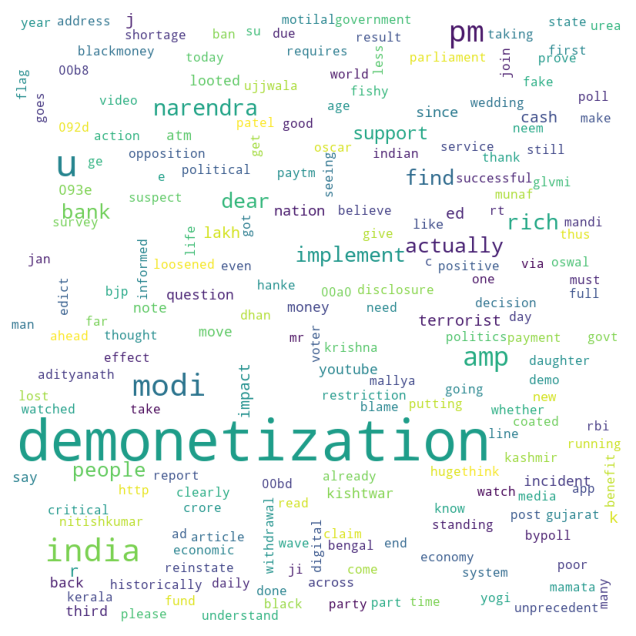

In [21]:
plt.figure(figsize = (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
'''''
print(len(common_word.split()) , len( set(common_word.split())))
## removing duplicates
common_words_without_duplicates=" ".join(list(set(common_word.split())))

wordcloud = WordCloud(width =1600, height =800,
                      background_color="white",
                      stopwords = stop_words,
                      min_font_size=10).generate(common_words_without_duplicates)
plt.figure(figsize = (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
'''''
print()

### Applying Sentiment Analysis

We will apply  Sentiment Analysis on the dataset to classify the tweets to positive, negative & neutral. It is kind of unsupervised learning since we do not have a target variable. 

In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
SIA = SentimentIntensityAnalyzer()

In [26]:
# senetnce
a = "the mobile which i brought from amazon was very good in service and i recommend you to buy"
SIA.polarity_scores(a)
# {'compound': 0.7501, 'neg': 0.0, 'neu': 0.637, 'pos': 0.363}
# Negative : neg
# Positive : pos
# Neutral  : neutral
# compund  : normalized score for all three(pos/neu/neg) and in order to get the sentiment we look for compund score

# comp_score > 0 "POS" comp_score<0 "NEG" comp_score = 0 "NEU"

{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.7501}

In [27]:
sc_list = []
for i in data['text']:
    score = SIA.polarity_scores(i)["compound"]
    sc_list.append(score)


df["Sentiment_Score"] = sc_list

df_final= df[['text','Sentiment_Score']]
df_final["Sentiment_Category"] = np.where(df_final["Sentiment_Score"]>0,"positive", np.where(df_final["Sentiment_Score"]<0,
                                                                                   "negative","neutral"))


C:\Users\Asia\AppData\Local\Temp\ipykernel_16704\1389265651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Sentiment_Category"] = np.where(df_final["Sentiment_Score"]>0,"positive", np.where(df_final["Sentiment_Score"]<0,


In [28]:
df_final

text  Sentiment_Score  \
0      critical question paytm informed demonetizatio...           0.1027   
1                 80 vote demonetization modi survey app           0.0000   
2      former finsec rbi dy governor cbdt chair harva...           0.0000   
3      news gurugram haryana post office employees pr...           0.0000   
4      reddy wedding today cartoon demonetization red...           0.0000   
...                                                  ...              ...   
14935  ghost demonetization returns reports cash crun...          -0.3182   
14936  n modi fans true nationalists country stil thi...          -0.0772   
14937  builder lol demonetization fixed lot like ston...           0.7964   
14938  b team bjp cia baby cctv evm vvpat support sur...           0.5499   
14939  b team bjp cia baby cctv evm vvpat support sur...           0.5499   

      Sentiment_Category  
0               positive  
1                neutral  
2                neutral  
3                neutral  
4                neutral  
...                  ...  
14935           negative  
14936           negative  
14937           positive  
14938           positive  
14939           positive  

[14940 rows x 3 columns]

###### We will use emoji lib to add emojis according to the  sentiment category

In [29]:
#!pip install emoji
import emoji
#emo = ":smile:"
#emo = ":disappointed:"
emo = ":expressionless:"
print(emoji.emojize('{}'.format(':smile:'), language='alias'))
print(emoji.emojize('{}'.format(':disappointed:'), language='alias'))
print(emoji.emojize('{}'.format(emo), language='alias'))



😄
😞
😑


In [30]:
df_final['emoji']=np.where(df_final["Sentiment_Score"]>0,emoji.emojize('{}'.format(":smile:"), language='alias'), np.where(df_final["Sentiment_Score"]<0, emoji.emojize('{}'.format(":disappointed:"), language='alias'),
                                                                                  emoji.emojize('{}'.format(":expressionless:"), language='alias')))


C:\Users\Asia\AppData\Local\Temp\ipykernel_16704\2922683895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['emoji']=np.where(df_final["Sentiment_Score"]>0,emoji.emojize('{}'.format(":smile:"), language='alias'), np.where(df_final["Sentiment_Score"]<0, emoji.emojize('{}'.format(":disappointed:"), language='alias'),


In [31]:
df_final

text  Sentiment_Score  \
0      critical question paytm informed demonetizatio...           0.1027   
1                 80 vote demonetization modi survey app           0.0000   
2      former finsec rbi dy governor cbdt chair harva...           0.0000   
3      news gurugram haryana post office employees pr...           0.0000   
4      reddy wedding today cartoon demonetization red...           0.0000   
...                                                  ...              ...   
14935  ghost demonetization returns reports cash crun...          -0.3182   
14936  n modi fans true nationalists country stil thi...          -0.0772   
14937  builder lol demonetization fixed lot like ston...           0.7964   
14938  b team bjp cia baby cctv evm vvpat support sur...           0.5499   
14939  b team bjp cia baby cctv evm vvpat support sur...           0.5499   

      Sentiment_Category emoji  
0               positive     😄  
1                neutral     😑  
2                neutral     😑  
3                neutral     😑  
4                neutral     😑  
...                  ...   ...  
14935           negative     😞  
14936           negative     😞  
14937           positive     😄  
14938           positive     😄  
14939           positive     😄  

[14940 rows x 4 columns]

<br>

###### Now we have a labled data, so let's train classification model where we use TfidfVectorizer to convert the text to vector and we apply ML algoritms 

<br>

<br>

## Model Training

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [33]:
df_final['Sentiment_Category']=df_final['Sentiment_Category'].map({'negative': 0, 'positive': 1, 'neutral':2 })

C:\Users\Asia\AppData\Local\Temp\ipykernel_16704\2735805481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Sentiment_Category']=df_final['Sentiment_Category'].map({'negative': 0, 'positive': 1, 'neutral':2 })


In [34]:
df_final['Sentiment_Category']

0        1
1        2
2        2
3        2
4        2
        ..
14935    0
14936    0
14937    1
14938    1
14939    1
Name: Sentiment_Category, Length: 14940, dtype: int64

In [35]:
len(df[df_final['Sentiment_Category']==0]), len(df[df_final['Sentiment_Category']==1]), len(df[df_final['Sentiment_Category']==2])

(3937, 6568, 4435)

In [36]:
y=df_final['Sentiment_Category']
X= df_final['text']


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.20, random_state=1)

In [38]:

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
vectorizer.get_feature_names_out()


array(['00', '000', '007', ..., 'zero', 'zindabad', 'zone'], dtype=object)

In [39]:
X_train.shape

(11952, 7975)

In [40]:
X_test= vectorizer.transform(X_test)


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , recall_score, precision_score
from sklearn.metrics import roc_curve ,confusion_matrix , auc, roc_auc_score, classification_report , f1_score

In [42]:
def apply_algo(model, algoname):
    scoreslist=[]
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    y_predicted=model.predict(X_test)
    print(confusion_matrix(y_test, y_predicted))
    print(classification_report(y_test, y_predicted))

    print("accuracy", accuracy_score(y_test,y_predicted))
    print("recall ", recall_score(y_test,y_predicted , average='macro'))
    print( 'precision ',precision_score(y_test,y_predicted , average='macro' ))
    scoreslist.append( {'classiffier': algoname , 'accuracy':round(accuracy_score(y_test,y_predicted ),3)
                , 'recall':round(recall_score(y_test,y_predicted , average='macro' ),3)
                , 'precision': round(precision_score(y_test,y_predicted, average='macro'),3)
              , 'f1-score': round(f1_score(y_test,y_predicted , average='macro'),3) })
    return scoreslist


In [43]:
scores_dataframe= pd.DataFrame(columns=['classiffier' ,'accuracy' ,'recall' , 'precision' , 'f1-score'])

### 1) MultinomialNB Algorithm

In [44]:
model = MultinomialNB()

In [45]:
results=apply_algo(model,'MultinomialNB' )
results

[[ 670   67   47]
 [  47 1235   60]
 [  52   85  725]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       784
           1       0.89      0.92      0.91      1342
           2       0.87      0.84      0.86       862

    accuracy                           0.88      2988
   macro avg       0.88      0.87      0.87      2988
weighted avg       0.88      0.88      0.88      2988

accuracy 0.8801874163319946
recall  0.8719757928171181
precision  0.8776888560289549


[{'classiffier': 'MultinomialNB',
  'accuracy': 0.88,
  'recall': 0.872,
  'precision': 0.878,
  'f1-score': 0.875}]

In [46]:
scores_dataframe=scores_dataframe.append(results)
scores_dataframe

C:\Users\Asia\AppData\Local\Temp\ipykernel_16704\961713972.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append(results)


classiffier  accuracy  recall  precision  f1-score
0  MultinomialNB      0.88   0.872      0.878     0.875

### 2) RandomForest Algorithm

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=1)
results=apply_algo(rf,'RandomForestClassifier' )
results

[[ 685   22   77]
 [  19 1225   98]
 [  11   13  838]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       784
           1       0.97      0.91      0.94      1342
           2       0.83      0.97      0.89       862

    accuracy                           0.92      2988
   macro avg       0.92      0.92      0.92      2988
weighted avg       0.93      0.92      0.92      2988

accuracy 0.9196787148594378
recall  0.9195663179743147
precision  0.9191699949350491


[{'classiffier': 'RandomForestClassifier',
  'accuracy': 0.92,
  'recall': 0.92,
  'precision': 0.919,
  'f1-score': 0.916}]

In [48]:
scores_dataframe=scores_dataframe.append(results)
scores_dataframe

C:\Users\Asia\AppData\Local\Temp\ipykernel_16704\961713972.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append(results)


classiffier  accuracy  recall  precision  f1-score
0           MultinomialNB      0.88   0.872      0.878     0.875
0  RandomForestClassifier      0.92   0.920      0.919     0.916

### 3) XGBClassifier Algorithm

In [49]:
from xgboost import XGBClassifier

xgbclassifier = XGBClassifier(n_estimators=700, random_state=1)
results=apply_algo(xgbclassifier,'XGBClassifier' )
results

[[ 698   31   55]
 [  27 1239   76]
 [  33   19  810]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       784
           1       0.96      0.92      0.94      1342
           2       0.86      0.94      0.90       862

    accuracy                           0.92      2988
   macro avg       0.91      0.92      0.92      2988
weighted avg       0.92      0.92      0.92      2988

accuracy 0.9193440428380187
recall  0.9177433929093922
precision  0.9142803217076039


[{'classiffier': 'XGBClassifier',
  'accuracy': 0.919,
  'recall': 0.918,
  'precision': 0.914,
  'f1-score': 0.915}]

In [50]:
scores_dataframe=scores_dataframe.append(results)
scores_dataframe

C:\Users\Asia\AppData\Local\Temp\ipykernel_16704\961713972.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append(results)


classiffier  accuracy  recall  precision  f1-score
0           MultinomialNB     0.880   0.872      0.878     0.875
0  RandomForestClassifier     0.920   0.920      0.919     0.916
0           XGBClassifier     0.919   0.918      0.914     0.915

### 4) LogisticRegression Algorithm

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000 , random_state=1 )

In [52]:
results=apply_algo(lr,'LogisticRegression' )
results

[[ 694   47   43]
 [  25 1258   59]
 [  42   40  780]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       784
           1       0.94      0.94      0.94      1342
           2       0.88      0.90      0.89       862

    accuracy                           0.91      2988
   macro avg       0.91      0.91      0.91      2988
weighted avg       0.91      0.91      0.91      2988

accuracy 0.9143239625167336
recall  0.909161108954493
precision  0.910542558897471


[{'classiffier': 'LogisticRegression',
  'accuracy': 0.914,
  'recall': 0.909,
  'precision': 0.911,
  'f1-score': 0.91}]

In [53]:
scores_dataframe=scores_dataframe.append(results)
scores_dataframe

C:\Users\Asia\AppData\Local\Temp\ipykernel_16704\961713972.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append(results)


classiffier  accuracy  recall  precision  f1-score
0           MultinomialNB     0.880   0.872      0.878     0.875
0  RandomForestClassifier     0.920   0.920      0.919     0.916
0           XGBClassifier     0.919   0.918      0.914     0.915
0      LogisticRegression     0.914   0.909      0.911     0.910

<br>

###### We can conculde that RandomForestClassifier is having the best scores . I was able to get a very good model without doing any kind of hypertuning. To improve the model performace, we can do hypertuning parameters. 